In [1]:

import pandas as pd
import json

In [3]:
# Load the JSONL file
file_path = "part-1.jsonl"

data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame for easier analysis
df = pd.DataFrame(data)

# Display the first few rows, showing all columns
pd.set_option('display.max_columns', None)
df.head()

datePublished   docSubType  docType               doi  \
0    1993-01-01         misc  article    10.2307/183062   
1    1972-01-01  book-review  article    10.2307/180596   
2    2004-01-01  book-review  article   10.2307/4100485   
3    2013-01-01  book-review  article  10.2307/43305140   
4    1992-01-01  book-review  article    10.2307/183022   

                                            fullText  \
0  [I Introducing... X KRONOS: Journal of Cape Hi...   
1  [LEGON HISTORY SERIES Asante and its Nezghbour...   
2  [THE WRITTEN WORD AND THE COLONIAL ENCOUNTER D...   
3  [444 I VOL. 54, NO. 3 REVIEWS ROMANTICIZING TR...   
4  [NKRUMAH IN EXILE Kwame Nkrumah: The Conakry Y...   

                                     id  \
0    http://www.jstor.org/stable/183062   
1    http://www.jstor.org/stable/180596   
2   http://www.jstor.org/stable/4100485   
3  http://www.jstor.org/stable/43305140   
4    http://www.jstor.org/stable/183022   

                                          identifier  \
0  [{'name': 'doi', 'value': '10.2307/183062'}, {...   
1  [{'name': 'doi', 'value': '10.2307/180596'}, {...   
2  [{'name': 'doi', 'value': '10.2307/4100485'}, ...   
3  [{'name': 'doi', 'value': '10.2307/43305140'},...   
4  [{'name': 'doi', 'value': '10.2307/183022'}, {...   

                         isPartOf issueNumber  \
0  The Journal of African History           1   
1  The Journal of African History           3   
2  The Journal of African History           2   
3  The Journal of African History           3   
4  The Journal of African History           2   

                                           keyphrase language  \
0  [kronos, history, hmso publicity, social histo...    [eng]   
1  [asante, gold coast, legon history, protest mo...    [eng]   
2  [colonial, hawkins, colonial rule, northwester...    [eng]   
3  [manley, travel, deborah manley, century, bett...    [eng]   
4  [nkrumahs, conakry, conakry years, kwame nkrum...    [eng]   

                    outputFormat  pageCount provider  publicationYear  \
0  [unigrams, bigrams, trigrams]          6    jstor             1993   
1  [unigrams, bigrams, trigrams]          3    jstor             1972   
2  [unigrams, bigrams, trigrams]          2    jstor             2004   
3  [unigrams, bigrams, trigrams]          2    jstor             2013   
4  [unigrams, bigrams, trigrams]          2    jstor             1992   

                    publisher  \
0  Cambridge University Press   
1  Cambridge University Press   
2  Cambridge University Press   
3  Cambridge University Press   
4  Cambridge University Press   

                                      sourceCategory  \
0  [History, History, African Studies, Area Studies]   
1  [African Studies, Area Studies, History, History]   
2  [African Studies, Area Studies, History, History]   
3  [History, History, African Studies, Area Studies]   
4  [African Studies, Area Studies, History, History]   

                                         tdmCategory  \
0  [Social sciences - Communications, Information...   
1                  [Philosophy - Applied philosophy]   
2  [History - Historical methodology, Philosophy ...   
3                                [Arts - Literature]   
4                  [Philosophy - Applied philosophy]   

                                         title  \
0                                  Back Matter   
1                         Legon History Series   
2  The Written Word and the Colonial Encounter   
3     ROMANTICIZING TRAVEL IN A TIMELESS EGYPT   
4                             Nkrumah in Exile   

                                    url volumeNumber  wordCount  \
0    http://www.jstor.org/stable/183062           34       1528   
1    http://www.jstor.org/stable/180596           13       1355   
2   http://www.jstor.org/stable/4100485           45       1018   
3  http://www.jstor.org/stable/43305140           54        871   
4    http://www.jstor.org/stable/183022           33        668   

            

In [4]:
# Count occurrences of each journal in the 'isPartOf' column
journal_counts = df['isPartOf'].value_counts()

# Display the counts
print(journal_counts)

isPartOf
The Journal of African History                     5823
The Historical Journal                             4090
Past & Present                                     2158
History Workshop Journal                           1322
Journal of the Historical Society of Nigeria        852
Transactions of the Historical Society of Ghana     396
Name: count, dtype: int64


In [3]:
# Display the DataFrame columns
print(df.columns)

# Check the data types
print(df.dtypes)

# Display basic statistics
print(df.describe())

Index(['datePublished', 'docSubType', 'docType', 'doi', 'fullText', 'id',
       'identifier', 'isPartOf', 'issueNumber', 'keyphrase', 'language',
       'outputFormat', 'pageCount', 'provider', 'publicationYear', 'publisher',
       'sourceCategory', 'tdmCategory', 'title', 'url', 'volumeNumber',
       'wordCount', 'creator', 'pageEnd', 'pageStart', 'pagination',
       'abstract'],
      dtype='object')
datePublished      object
docSubType         object
docType            object
doi                object
fullText           object
id                 object
identifier         object
isPartOf           object
issueNumber        object
keyphrase          object
language           object
outputFormat       object
pageCount           int64
provider           object
publicationYear     int64
publisher          object
sourceCategory     object
tdmCategory        object
title              object
url                object
volumeNumber       object
wordCount           int64
creator           

## Step 1: Update the Function
Ensure the function processes the list of fullText properly.

In [20]:
def calculate_crisis_ratio(text_list, word_count):
    if isinstance(text_list, list) and word_count > 0:
        crisis_count = sum(text.lower().count('crisis') for text in text_list)
        return crisis_count / word_count
    return 0

## Step 2: Apply the Function
Apply the function correctly to each row.

In [21]:
df['crisis_ratio'] = df.apply(lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']), axis=1)

## Step 3: Group by Publication Year and Calculate Mean Ratio
Group the data by publicationYear and calculate the mean crisis ratio.

In [22]:
crisis_ratio_over_time = df.groupby('publicationYear')['crisis_ratio'].mean()

## Step 4: Plot the Results
Plot the results using a bar chart.

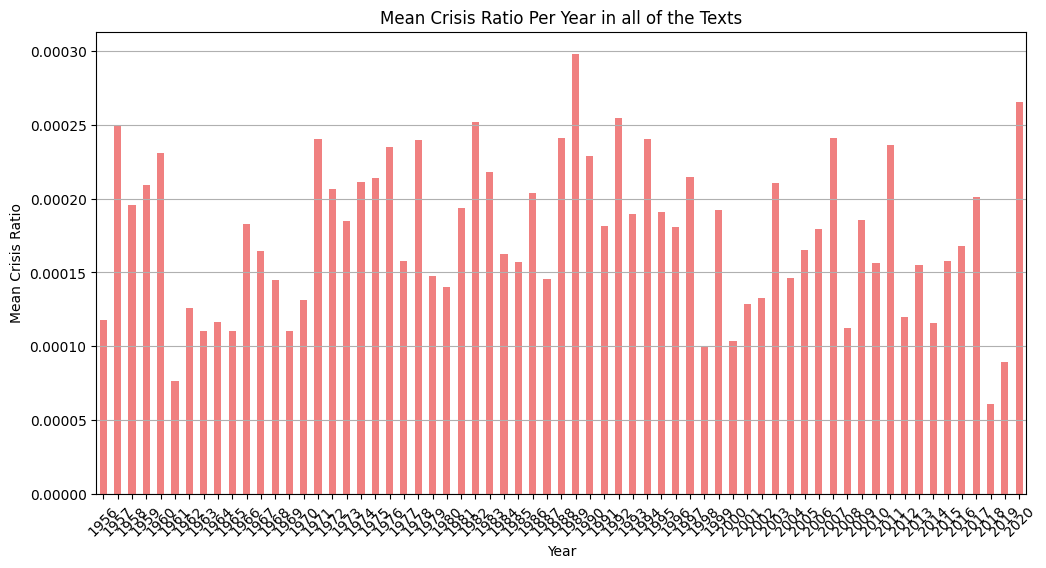

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
crisis_ratio_over_time.plot(kind='bar', color='lightcoral')
plt.title('Mean Crisis Ratio Per Year in all of the Texts')
plt.xlabel('Year')
plt.ylabel('Mean Crisis Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Plotting the same graphs but by journal

these graphs Display the mean crisis ratio per year, which is the average crisis mentions per document normalized by word count.

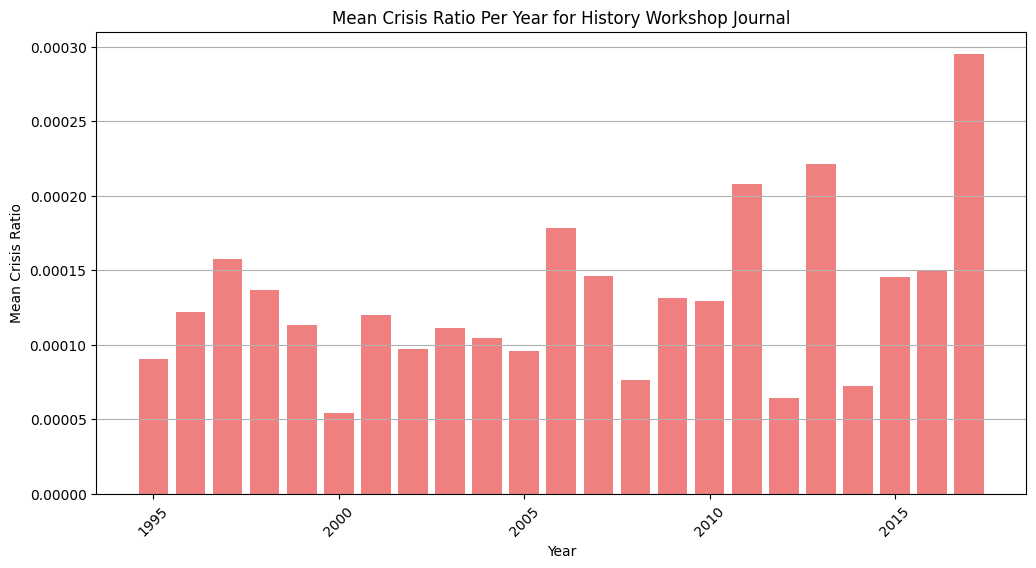

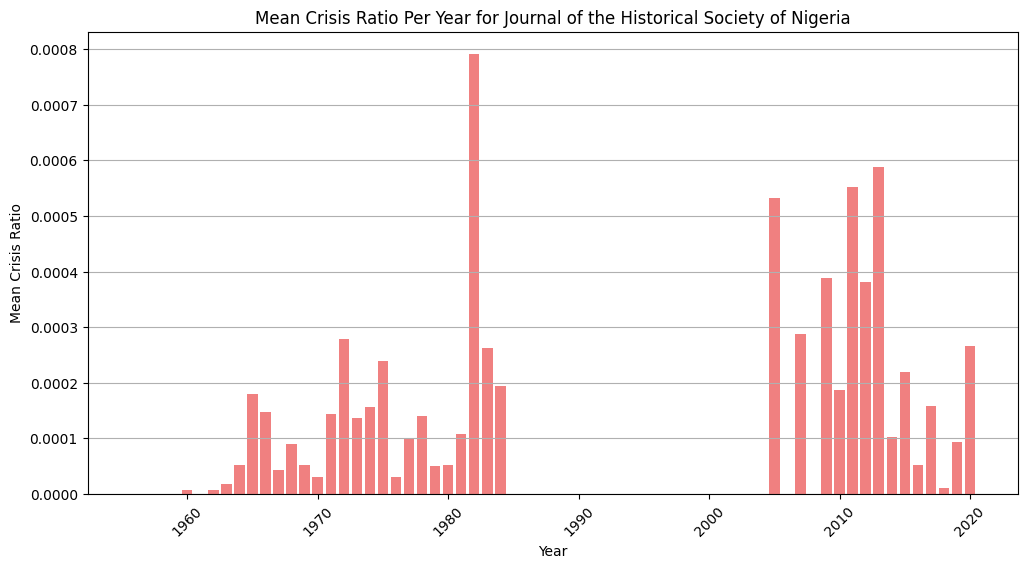

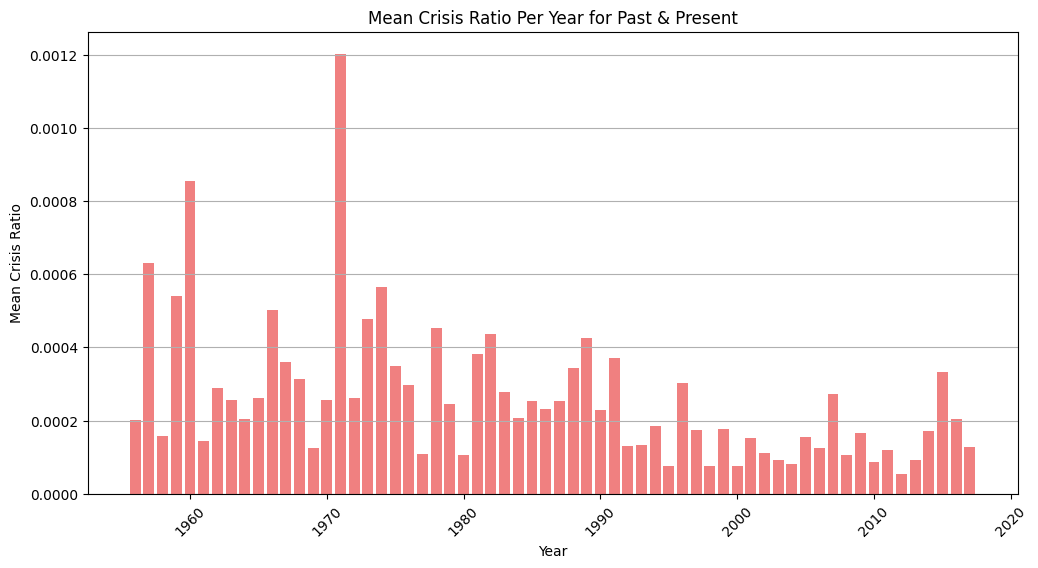

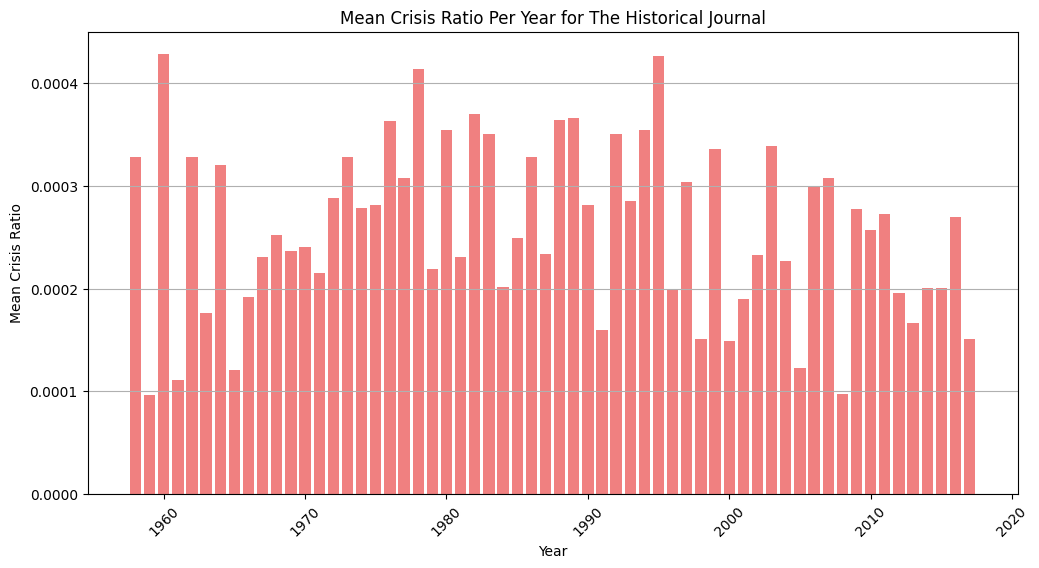

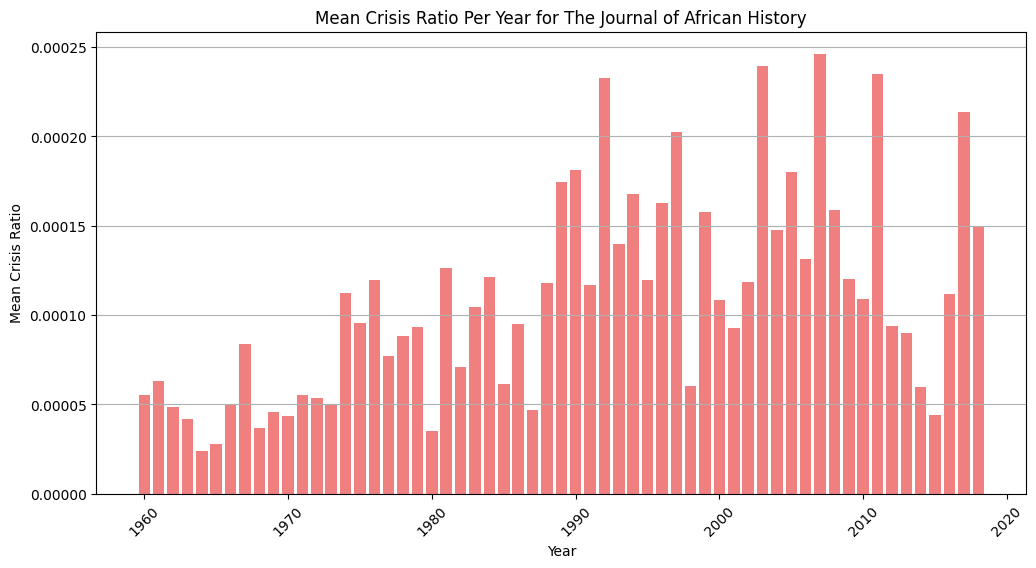

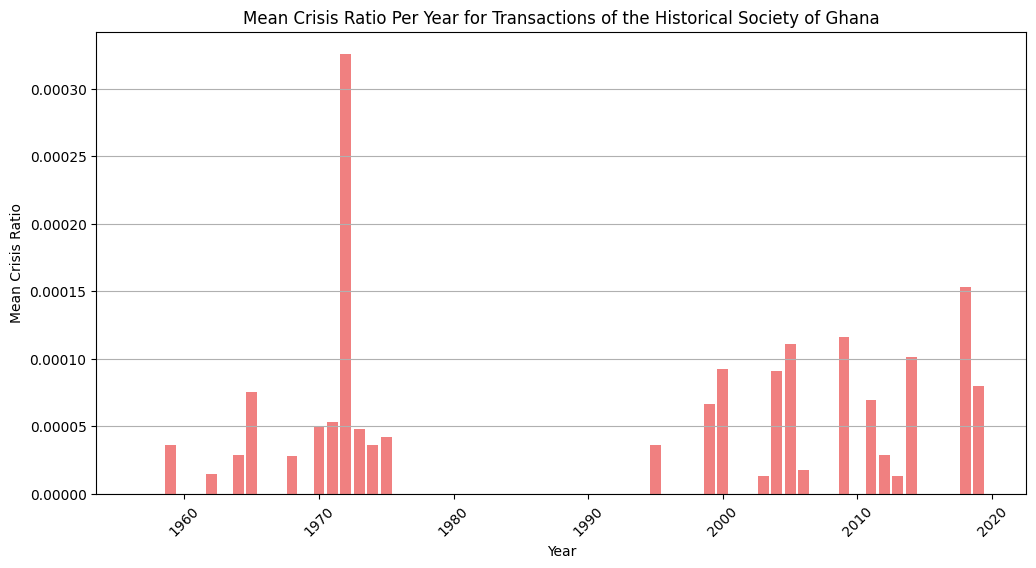

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['crisis_ratio'] = df.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

# Group by 'isPartOf' and 'publicationYear', then calculate the mean crisis ratio
crisis_ratio_by_journal = df.groupby(['isPartOf', 'publicationYear'])['crisis_ratio'].mean().reset_index()

# Plot for each journal
journals = crisis_ratio_by_journal['isPartOf'].unique()

for journal in journals:
    plt.figure(figsize=(12, 6))
    journal_data = crisis_ratio_by_journal[crisis_ratio_by_journal['isPartOf'] == journal]
    plt.bar(journal_data['publicationYear'], journal_data['crisis_ratio'], color='lightcoral')
    plt.title(f'Mean Crisis Ratio Per Year for {journal}')
    plt.xlabel('Year')
    plt.ylabel('Mean Crisis Ratio')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

#### These Graphs Show the overall crisis frequency, which is the total number of crisis mentions across all texts divided by the total word count for each journal and year.

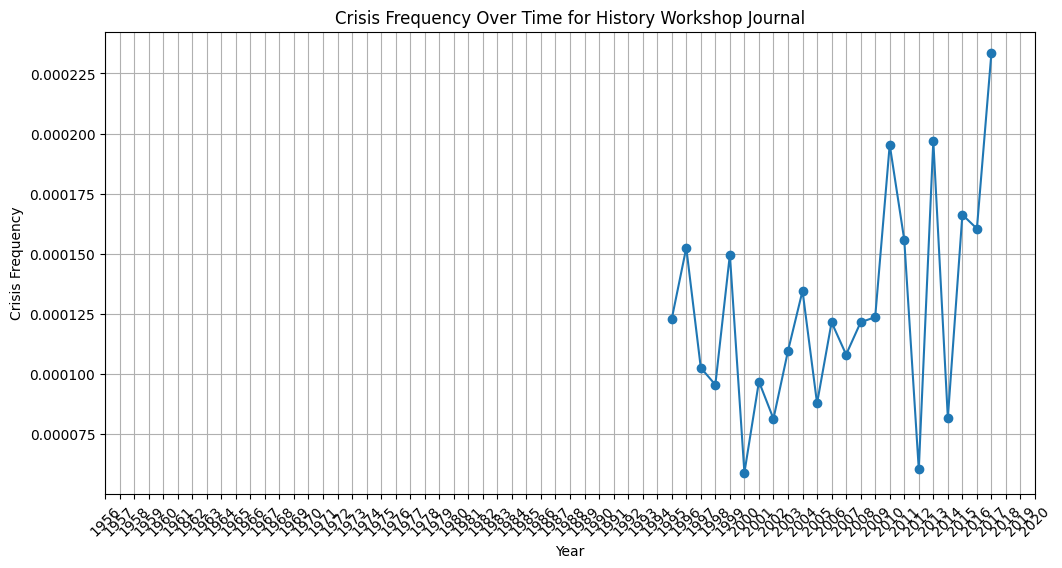

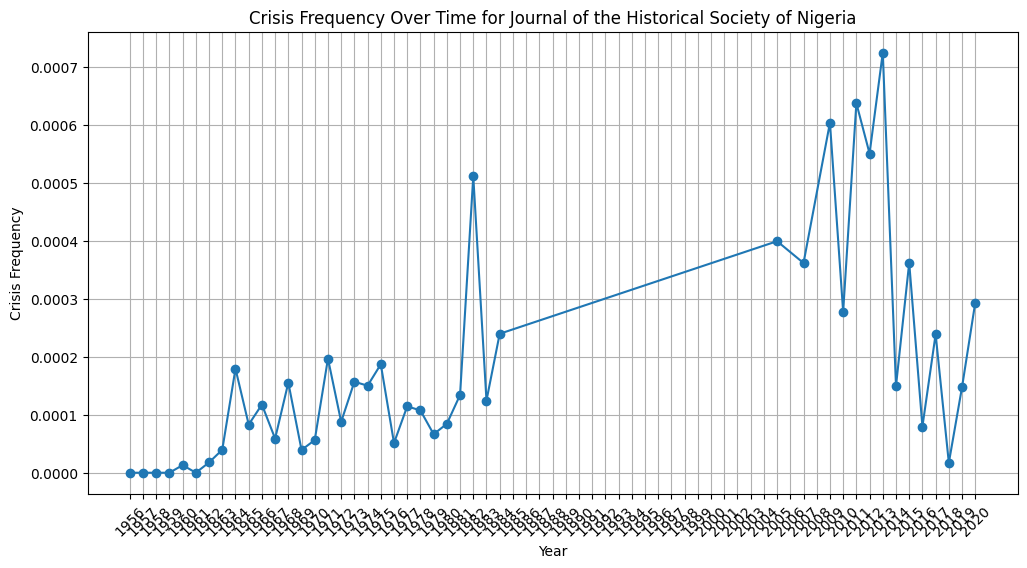

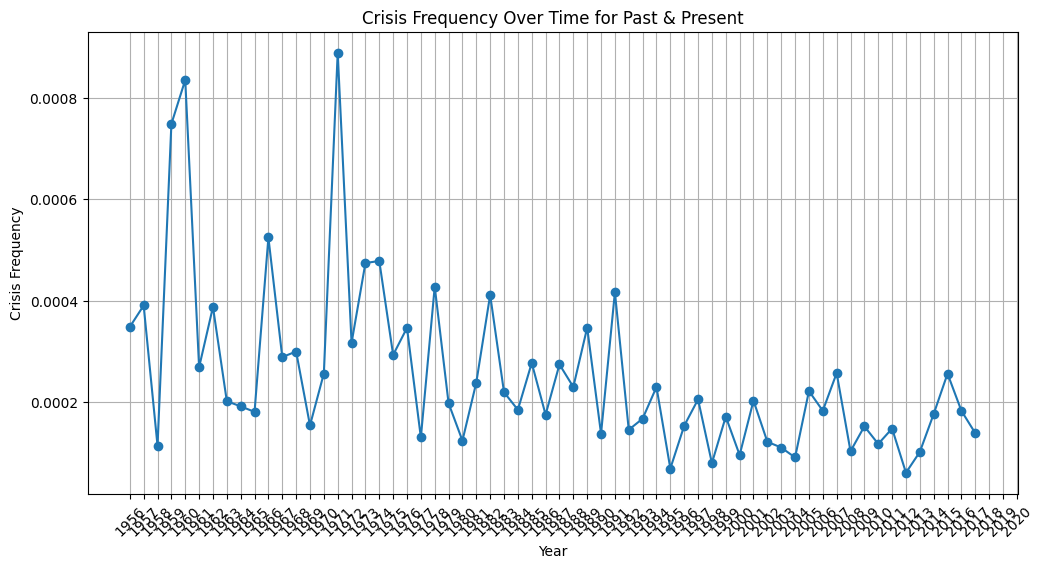

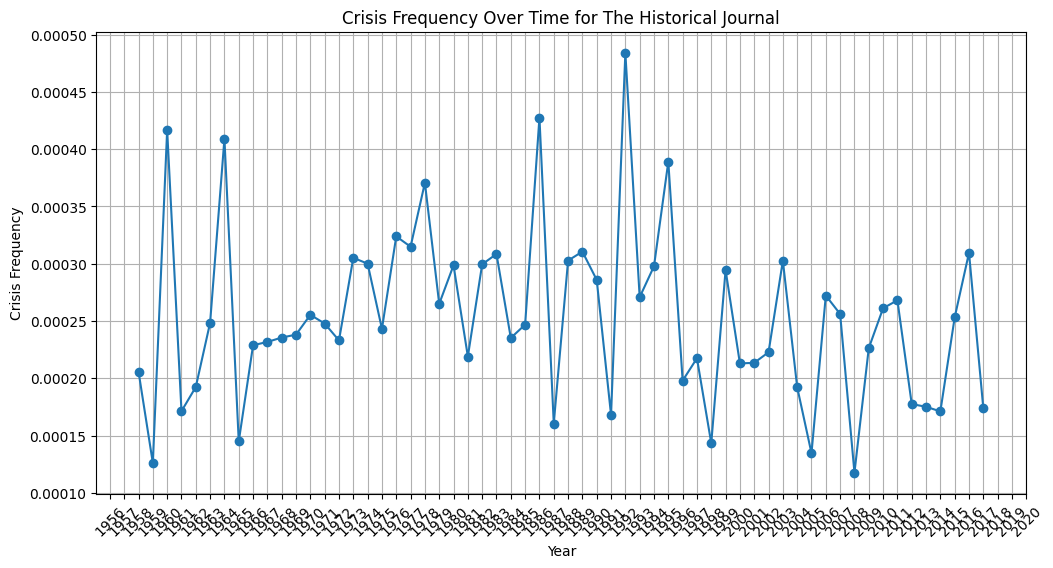

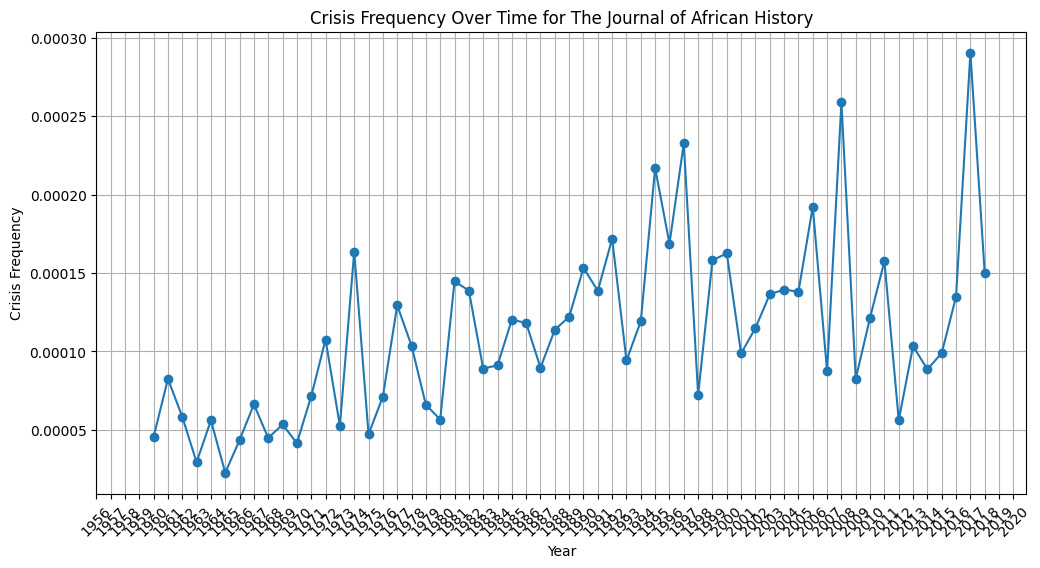

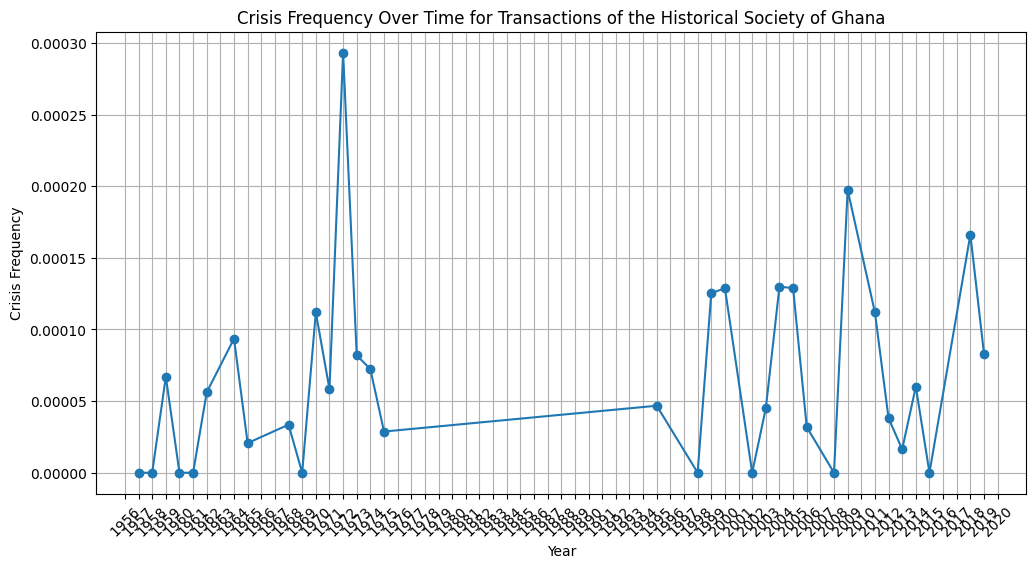

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
def calculate_crisis_frequency(text_list):
    return sum(text.lower().count('crisis') for text in text_list)

df['crisis_count'] = df['fullText'].apply(calculate_crisis_frequency)
df['total_word_count'] = df['wordCount']

grouped = df.groupby(['isPartOf', 'publicationYear']).agg({
    'crisis_count': 'sum',
    'total_word_count': 'sum'
}).reset_index()

grouped['crisis_frequency'] = grouped['crisis_count'] / grouped['total_word_count']

journals = grouped['isPartOf'].unique()
years = sorted(df['publicationYear'].unique())

for journal in journals:
    plt.figure(figsize=(12, 6))
    journal_data = grouped[grouped['isPartOf'] == journal]
    
    # Plot with all years on the x-axis
    plt.plot(journal_data['publicationYear'], journal_data['crisis_frequency'], marker='o', linestyle='-')
    plt.title(f'Crisis Frequency Over Time for {journal}')
    plt.xlabel('Year')
    plt.ylabel('Crisis Frequency')
    plt.xticks(years, rotation=45)  # Show all years
    plt.grid(axis='both')  # Add grid to both axes
    plt.show()


#### filtering the full texts to make the dataset only include keywords related to Africa, including countries and cities. calling them "African Related Documents"

In [39]:
import json
import pandas as pd

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

file_path = "part-1.jsonl"

data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

df_africa_related.head()

datePublished   docSubType  docType               doi  \
0    1993-01-01         misc  article    10.2307/183062   
1    1972-01-01  book-review  article    10.2307/180596   
2    2004-01-01  book-review  article   10.2307/4100485   
3    2013-01-01  book-review  article  10.2307/43305140   
4    1992-01-01  book-review  article    10.2307/183022   

                                            fullText  \
0  [I Introducing... X KRONOS: Journal of Cape Hi...   
1  [LEGON HISTORY SERIES Asante and its Nezghbour...   
2  [THE WRITTEN WORD AND THE COLONIAL ENCOUNTER D...   
3  [444 I VOL. 54, NO. 3 REVIEWS ROMANTICIZING TR...   
4  [NKRUMAH IN EXILE Kwame Nkrumah: The Conakry Y...   

                                     id  \
0    http://www.jstor.org/stable/183062   
1    http://www.jstor.org/stable/180596   
2   http://www.jstor.org/stable/4100485   
3  http://www.jstor.org/stable/43305140   
4    http://www.jstor.org/stable/183022   

                                          identifier  \
0  [{'name': 'doi', 'value': '10.2307/183062'}, {...   
1  [{'name': 'doi', 'value': '10.2307/180596'}, {...   
2  [{'name': 'doi', 'value': '10.2307/4100485'}, ...   
3  [{'name': 'doi', 'value': '10.2307/43305140'},...   
4  [{'name': 'doi', 'value': '10.2307/183022'}, {...   

                         isPartOf issueNumber  \
0  The Journal of African History           1   
1  The Journal of African History           3   
2  The Journal of African History           2   
3  The Journal of African History           3   
4  The Journal of African History           2   

                                           keyphrase language  \
0  [kronos, history, hmso publicity, social histo...    [eng]   
1  [asante, gold coast, legon history, protest mo...    [eng]   
2  [colonial, hawkins, colonial rule, northwester...    [eng]   
3  [manley, travel, deborah manley, century, bett...    [eng]   
4  [nkrumahs, conakry, conakry years, kwame nkrum...    [eng]   

                    outputFormat  pageCount provider  publicationYear  \
0  [unigrams, bigrams, trigrams]          6    jstor             1993   
1  [unigrams, bigrams, trigrams]          3    jstor             1972   
2  [unigrams, bigrams, trigrams]          2    jstor             2004   
3  [unigrams, bigrams, trigrams]          2    jstor             2013   
4  [unigrams, bigrams, trigrams]          2    jstor             1992   

                    publisher  \
0  Cambridge University Press   
1  Cambridge University Press   
2  Cambridge University Press   
3  Cambridge University Press   
4  Cambridge University Press   

                                      sourceCategory  \
0  [History, History, African Studies, Area Studies]   
1  [African Studies, Area Studies, History, History]   
2  [African Studies, Area Studies, History, History]   
3  [History, History, African Studies, Area Studies]   
4  [African Studies, Area Studies, History, History]   

                                         tdmCategory  \
0  [Social sciences - Communications, Information...   
1                  [Philosophy - Applied philosophy]   
2  [History - Historical methodology, Philosophy ...   
3                                [Arts - Literature]   
4                  [Philosophy - Applied philosophy]   

                                         title  \
0                                  Back Matter   
1                         Legon History Series   
2  The Written Word and the Colonial Encounter   
3     ROMANTICIZING TRAVEL IN A TIMELESS EGYPT   
4                             Nkrumah in Exile   

                                    url volumeNumber  wordCount  \
0    http://www.jstor.org/stable/183062           34       1528   
1    http://www.jstor.org/stable/180596           13       1355   
2   http://www.jstor.org/stable/4100485           45       1018   
3  http://www.jstor.org/stable/43305140           54        871   
4    http://www.jstor.org/stable/183022           33        668   

            

#### Plotting the Mean crisis ratio of "african related documents"

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/884224851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_ratio'] = df_africa_related.apply(


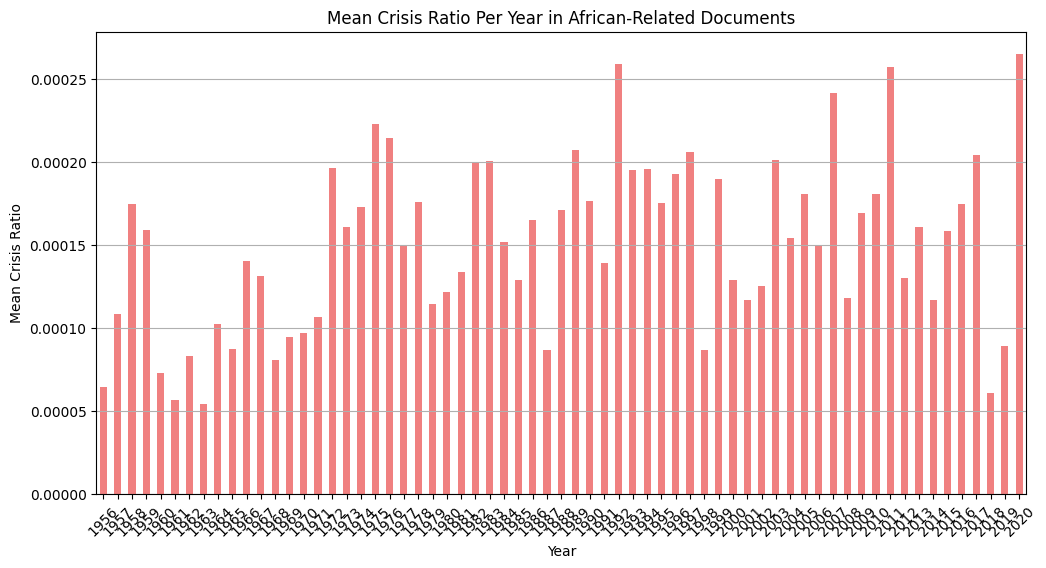

In [41]:
df_africa_related['crisis_ratio'] = df_africa_related.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

crisis_ratio_over_time = df_africa_related.groupby('publicationYear')['crisis_ratio'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
crisis_ratio_over_time.plot(kind='bar', color='lightcoral')
plt.title('Mean Crisis Ratio Per Year in African-Related Documents')
plt.xlabel('Year')
plt.ylabel('Mean Crisis Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Finding the number of "african related documents" in each journal

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/3694377190.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_ratio'] = df_africa_related.apply(


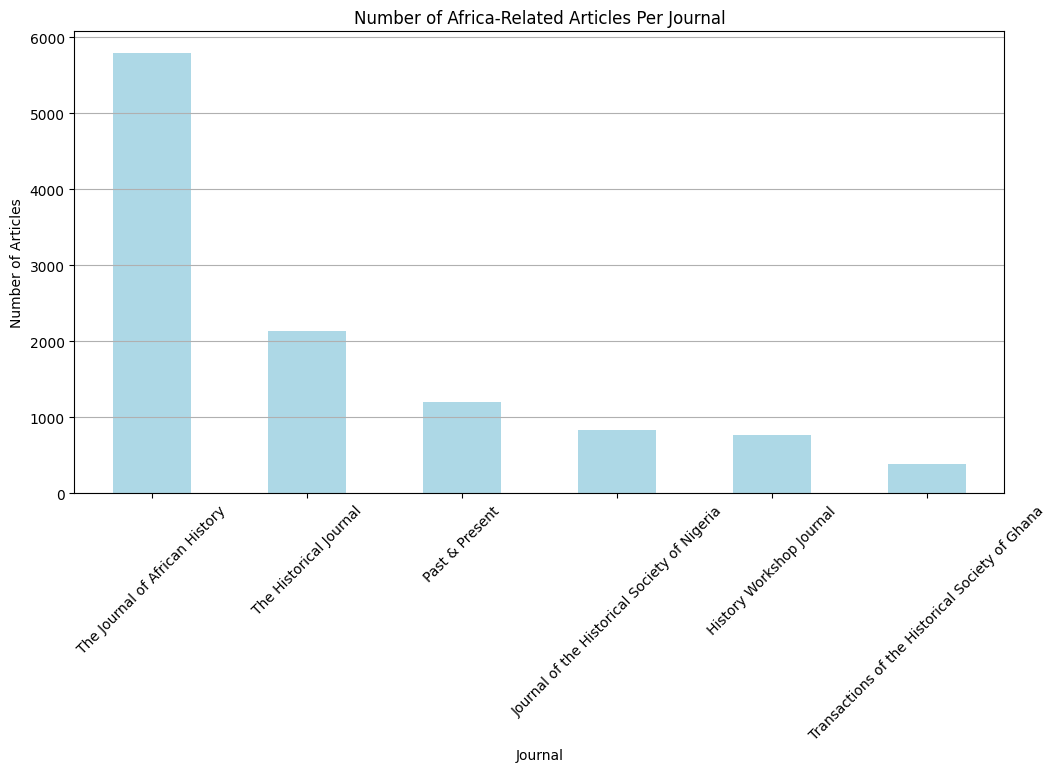

In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

file_path = "part-1.jsonl"

data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Calculate crisis ratio
df_africa_related['crisis_ratio'] = df_africa_related.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

# Group by publication year for crisis ratio
crisis_ratio_over_time = df_africa_related.groupby('publicationYear')['crisis_ratio'].mean()

# Count Africa-related articles per journal
journal_counts = df_africa_related['isPartOf'].value_counts()

plt.figure(figsize=(12, 6))
journal_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Africa-Related Articles Per Journal')
plt.xlabel('Journal')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Finding this as a percentage of all documents that are "african related"

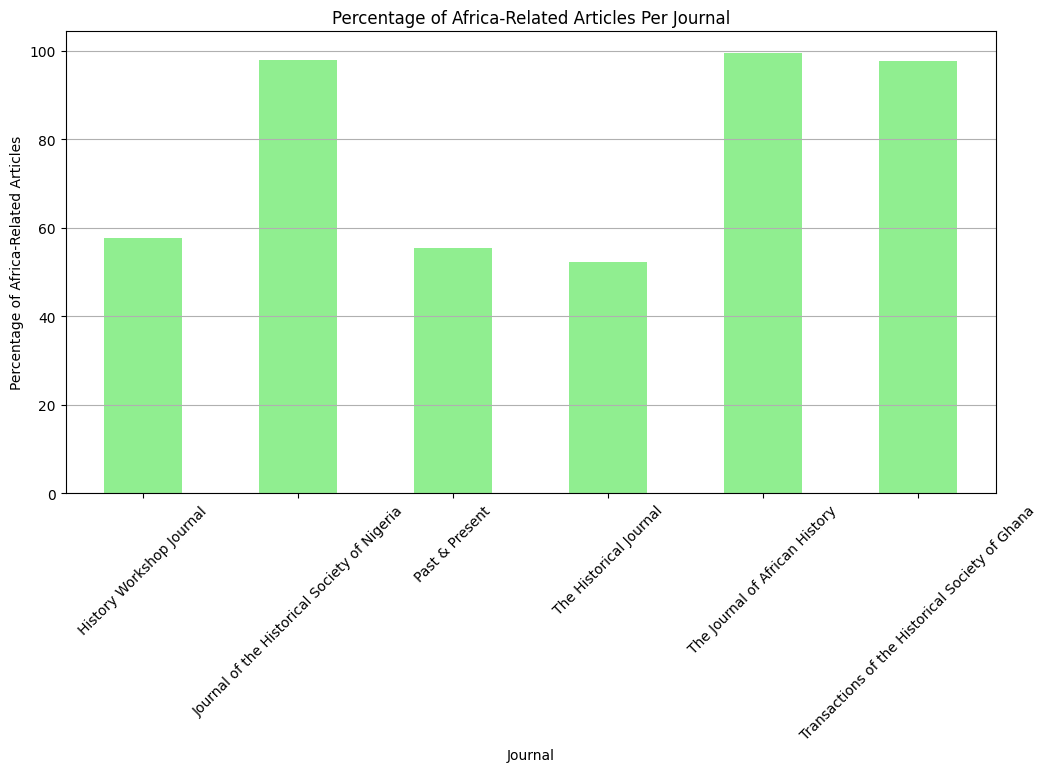

In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

file_path = "part-1.jsonl"

data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Count total articles per journal
total_journal_counts = df['isPartOf'].value_counts()

# Count Africa-related articles per journal
africa_journal_counts = df_africa_related['isPartOf'].value_counts()

# Calculate percentage of Africa-related articles
percentage_africa_related = (africa_journal_counts / total_journal_counts * 100).fillna(0)

# Plot percentage of Africa-related articles
plt.figure(figsize=(12, 6))
percentage_africa_related.plot(kind='bar', color='lightgreen')
plt.title('Percentage of Africa-Related Articles Per Journal')
plt.xlabel('Journal')
plt.ylabel('Percentage of Africa-Related Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/3033338858.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_ratio'] = df_africa_related.apply(


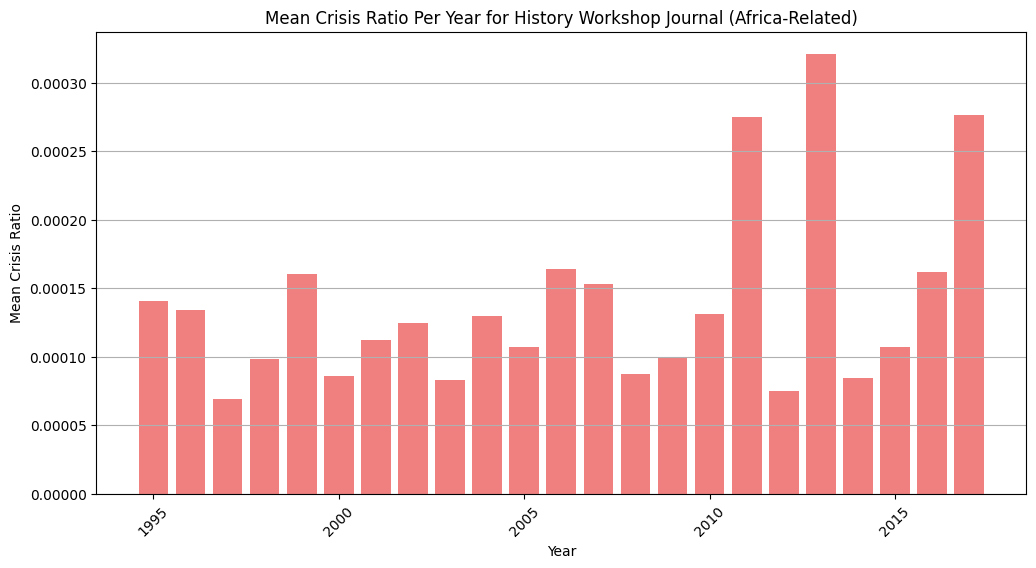

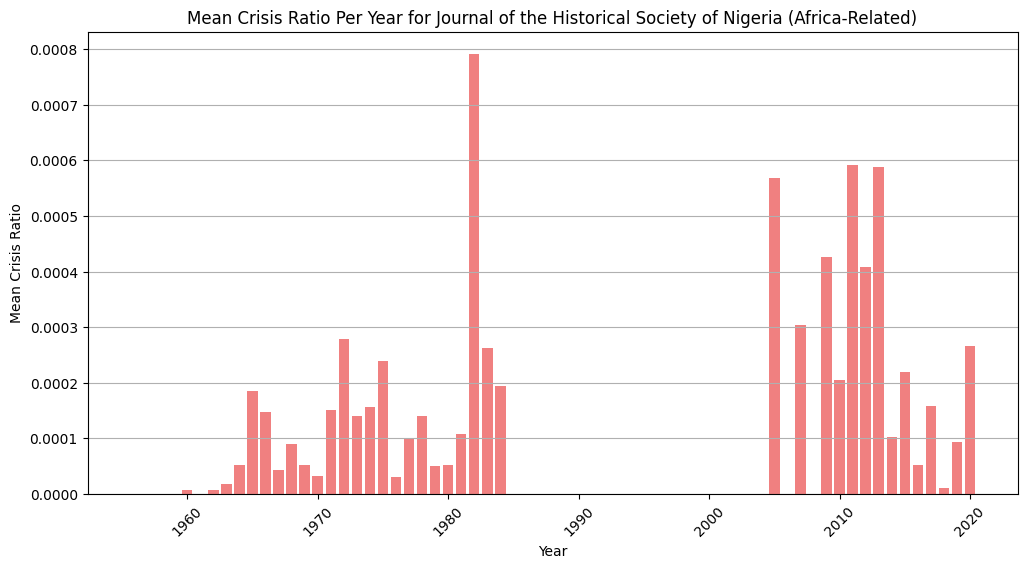

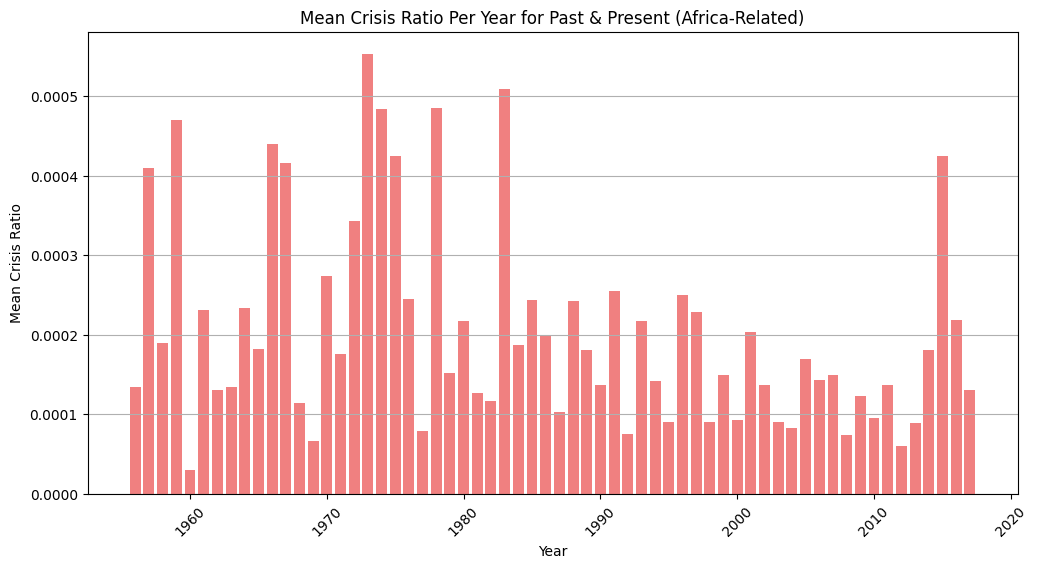

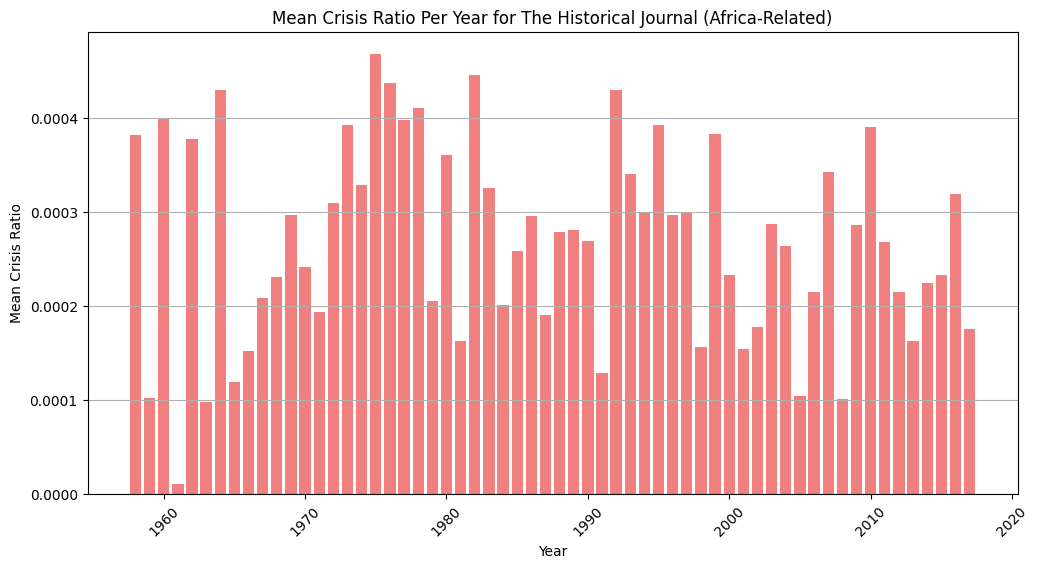

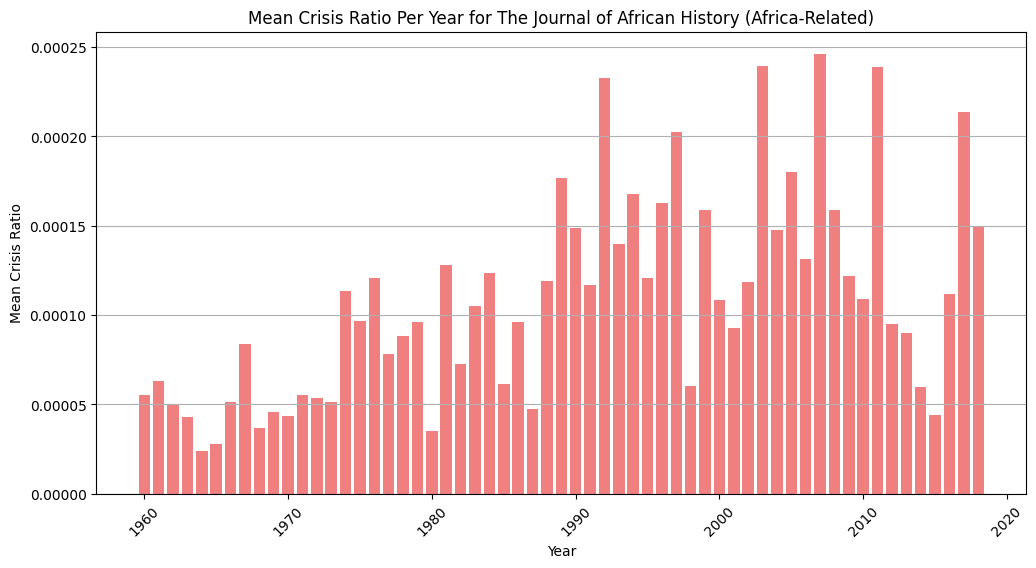

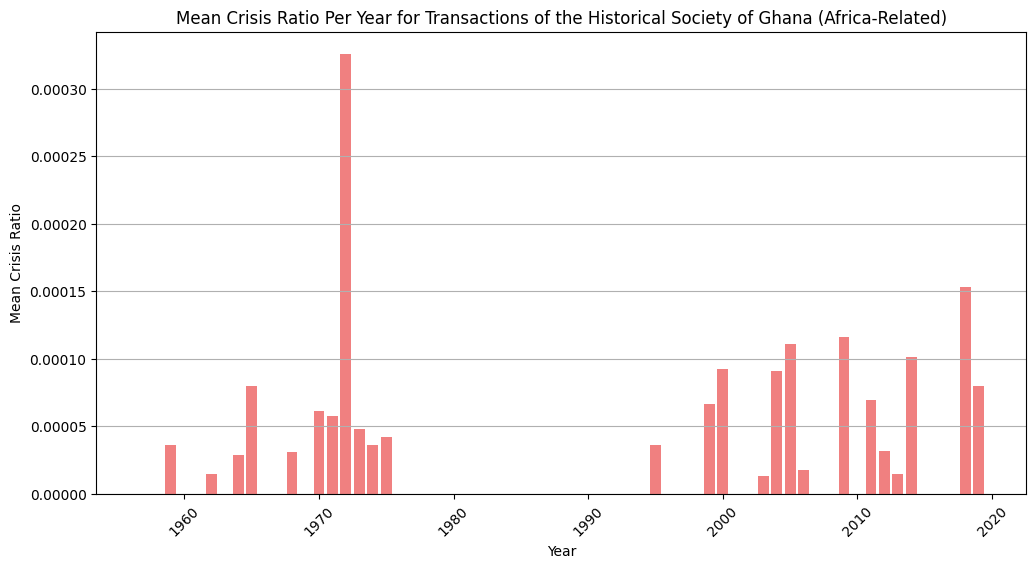

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Calculate crisis ratio for Africa-related articles
df_africa_related['crisis_ratio'] = df_africa_related.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

# Group by 'isPartOf' and 'publicationYear', then calculate the mean crisis ratio
crisis_ratio_by_journal = df_africa_related.groupby(['isPartOf', 'publicationYear'])['crisis_ratio'].mean().reset_index()

# Plot for each journal
journals = crisis_ratio_by_journal['isPartOf'].unique()

for journal in journals:
    plt.figure(figsize=(12, 6))
    journal_data = crisis_ratio_by_journal[crisis_ratio_by_journal['isPartOf'] == journal]
    plt.bar(journal_data['publicationYear'], journal_data['crisis_ratio'], color='lightcoral')
    plt.title(f'Mean Crisis Ratio Per Year for {journal} (Africa-Related)')
    plt.xlabel('Year')
    plt.ylabel('Mean Crisis Ratio')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/3210453229.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_count'] = df_africa_related['fullText'].apply(calculate_crisis_frequency)
/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/3210453229.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['total_word_count'] = df_africa_related['wordCount']


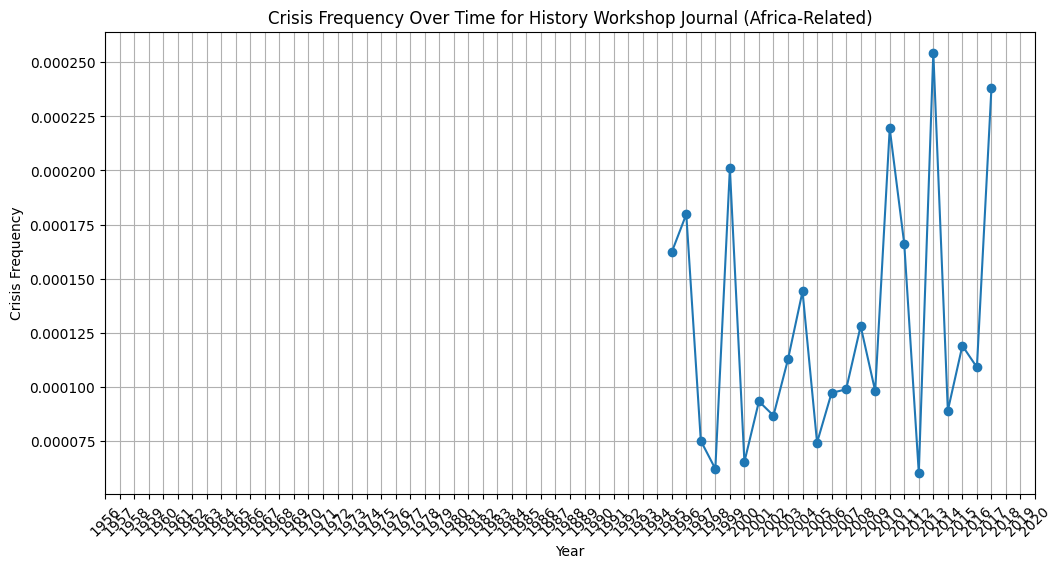

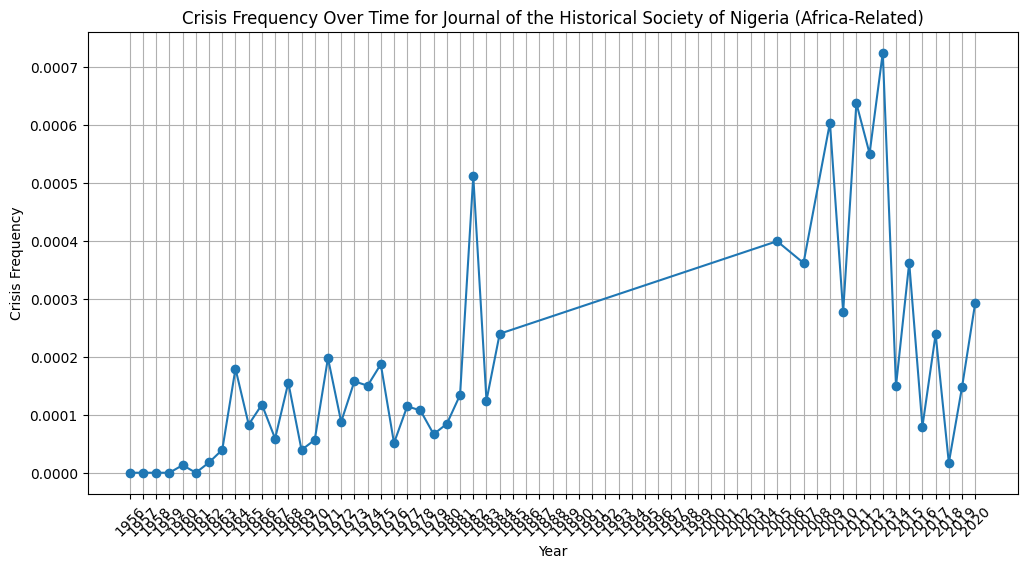

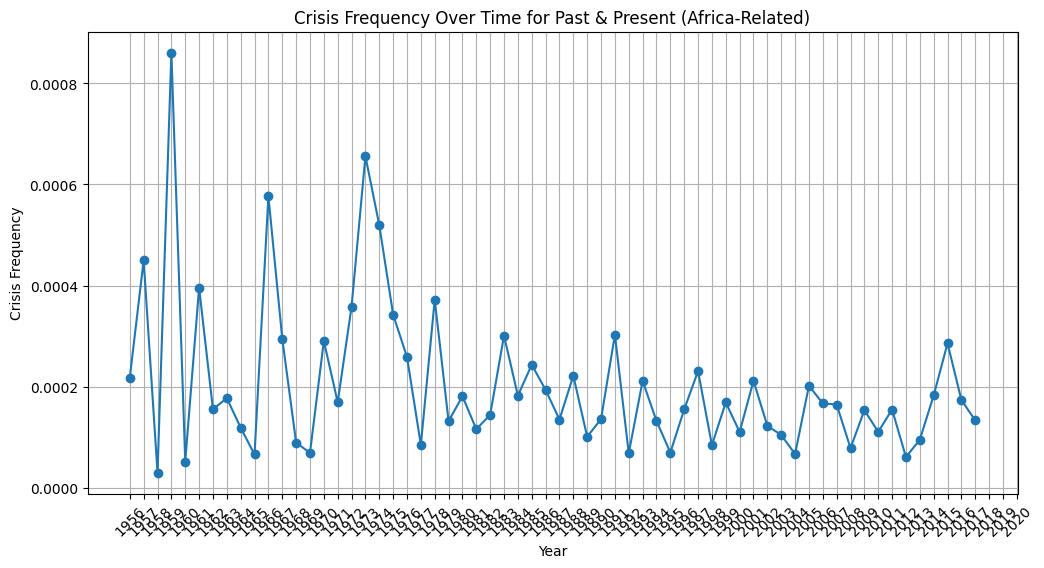

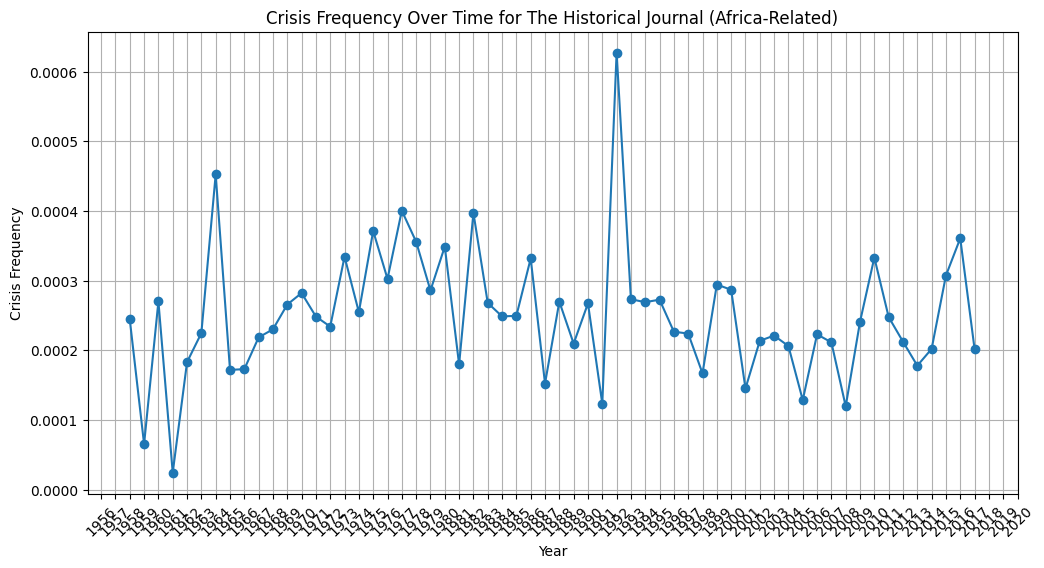

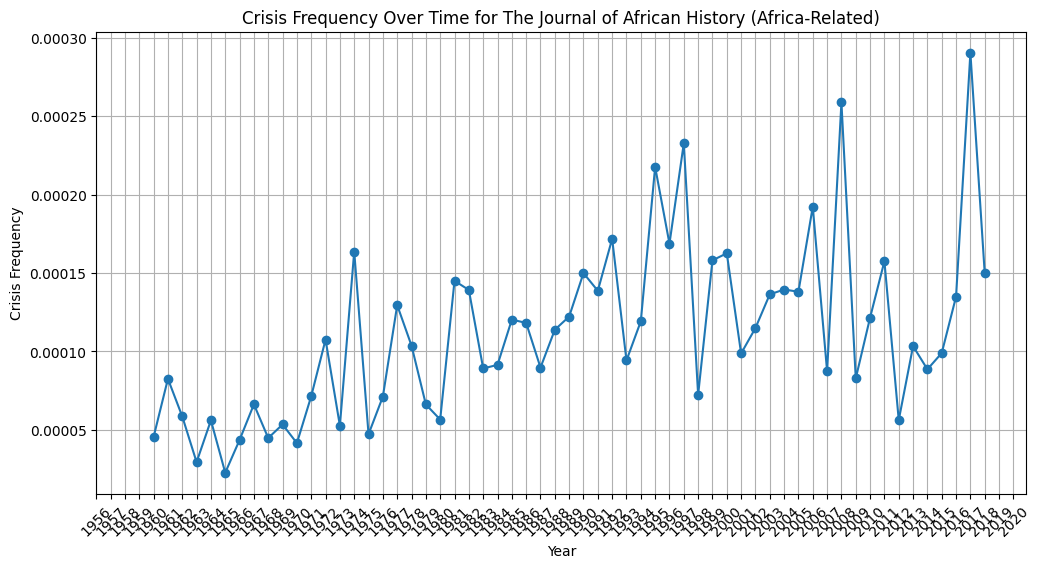

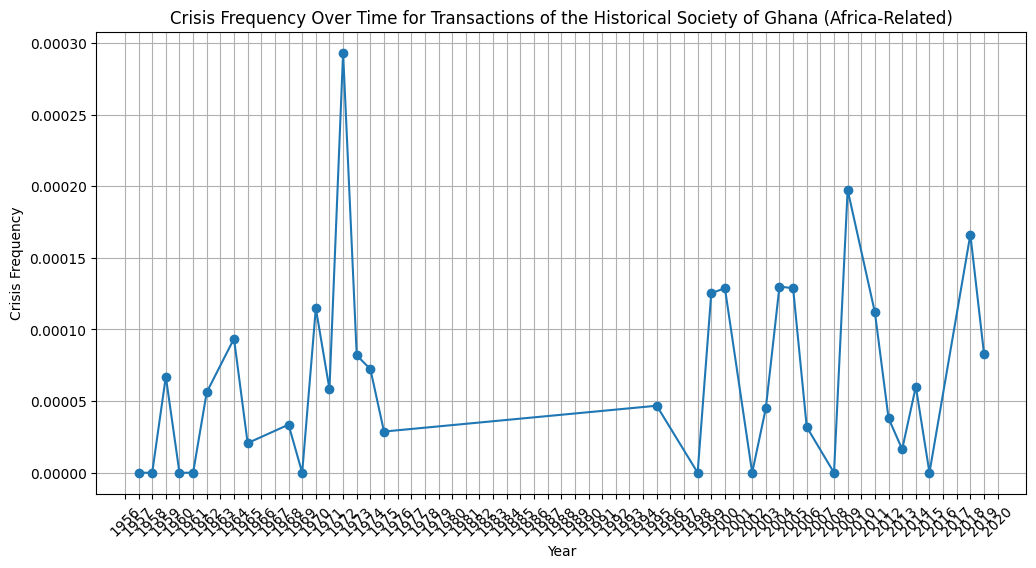

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Calculate crisis frequency for Africa-related articles
df_africa_related['crisis_count'] = df_africa_related['fullText'].apply(calculate_crisis_frequency)
df_africa_related['total_word_count'] = df_africa_related['wordCount']

grouped = df_africa_related.groupby(['isPartOf', 'publicationYear']).agg({
    'crisis_count': 'sum',
    'total_word_count': 'sum'
}).reset_index()

grouped['crisis_frequency'] = grouped['crisis_count'] / grouped['total_word_count']

journals = grouped['isPartOf'].unique()
years = sorted(df_africa_related['publicationYear'].unique())

for journal in journals:
    plt.figure(figsize=(12, 6))
    journal_data = grouped[grouped['isPartOf'] == journal]
    
    # Plot with all years on the x-axis
    plt.plot(journal_data['publicationYear'], journal_data['crisis_frequency'], marker='o', linestyle='-')
    plt.title(f'Crisis Frequency Over Time for {journal} (Africa-Related)')
    plt.xlabel('Year')
    plt.ylabel('Crisis Frequency')
    plt.xticks(years, rotation=45)  # Show all years
    plt.grid(axis='both')  # Add grid to both axes
    plt.show()

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_59322/2446580322.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_ratio'] = df_africa_related.apply(


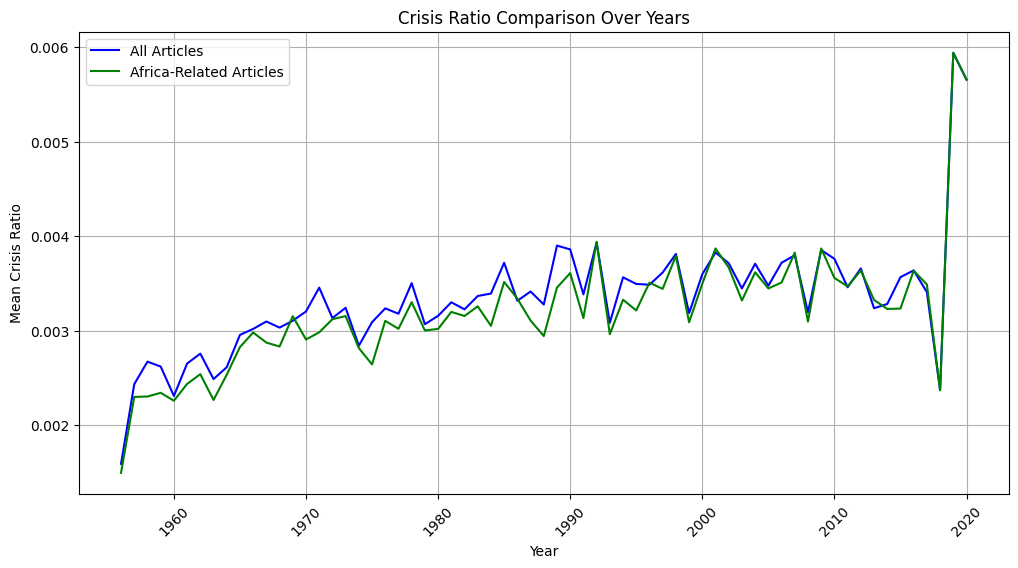

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to calculate crisis ratio
def calculate_crisis_ratio(full_text, word_count):
    crisis_keywords = ['crisis', 'conflict', 'war', 'famine', 'disaster', 'emergency']
    text = ' '.join(full_text).lower()
    crisis_count = sum(text.count(keyword) for keyword in crisis_keywords)
    return crisis_count / word_count if word_count > 0 else 0

# Load data
file_path = "part-1.jsonl"
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate crisis ratio for all articles
df['crisis_ratio'] = df.apply(lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']), axis=1)

# Filter Africa-related articles
africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Calculate crisis ratio for Africa-related articles
df_africa_related['crisis_ratio'] = df_africa_related.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

# Group by 'publicationYear' and calculate mean crisis ratio
crisis_ratio_all = df.groupby('publicationYear')['crisis_ratio'].mean().reset_index()
crisis_ratio_africa = df_africa_related.groupby('publicationYear')['crisis_ratio'].mean().reset_index()

# Merge dataframes for plotting
crisis_ratio_comparison = pd.merge(crisis_ratio_all, crisis_ratio_africa, on='publicationYear', suffixes=('_all', '_africa'))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(crisis_ratio_comparison['publicationYear'], crisis_ratio_comparison['crisis_ratio_all'], label='All Articles', color='blue')
plt.plot(crisis_ratio_comparison['publicationYear'], crisis_ratio_comparison['crisis_ratio_africa'], label='Africa-Related Articles', color='green')
plt.title('Crisis Ratio Comparison Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Crisis Ratio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_59322/502581730.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_ratio'] = df_africa_related.apply(


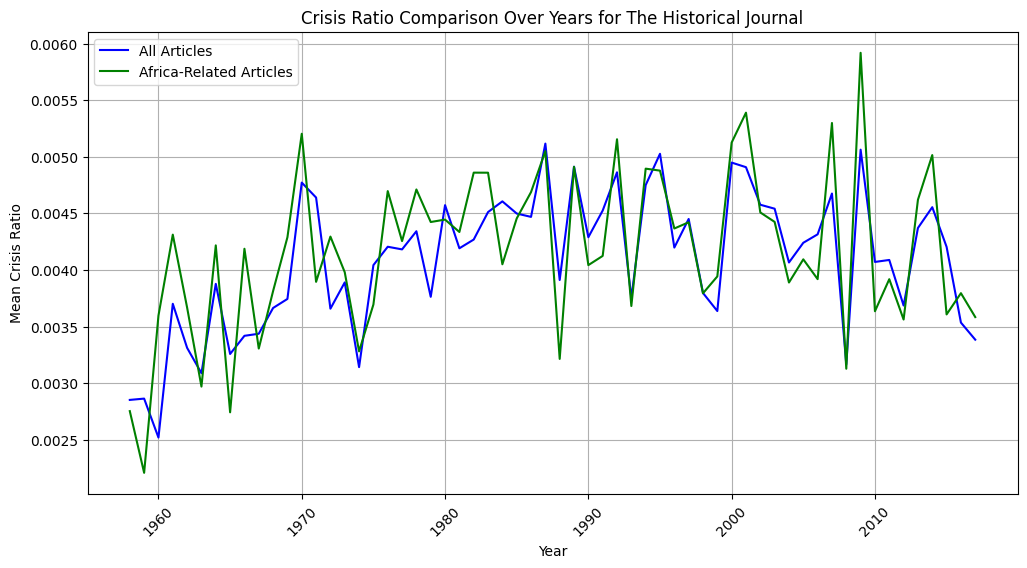

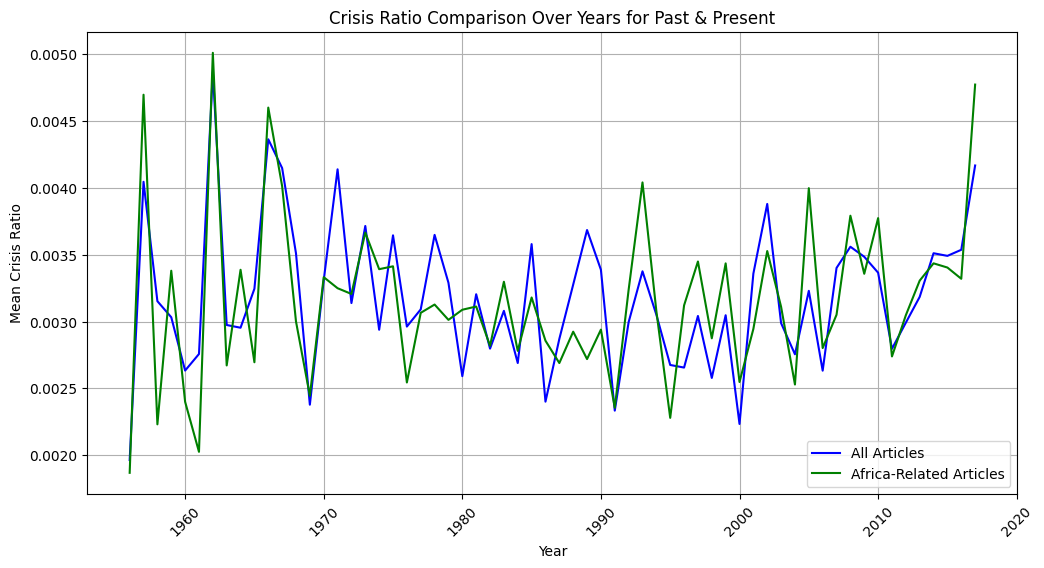

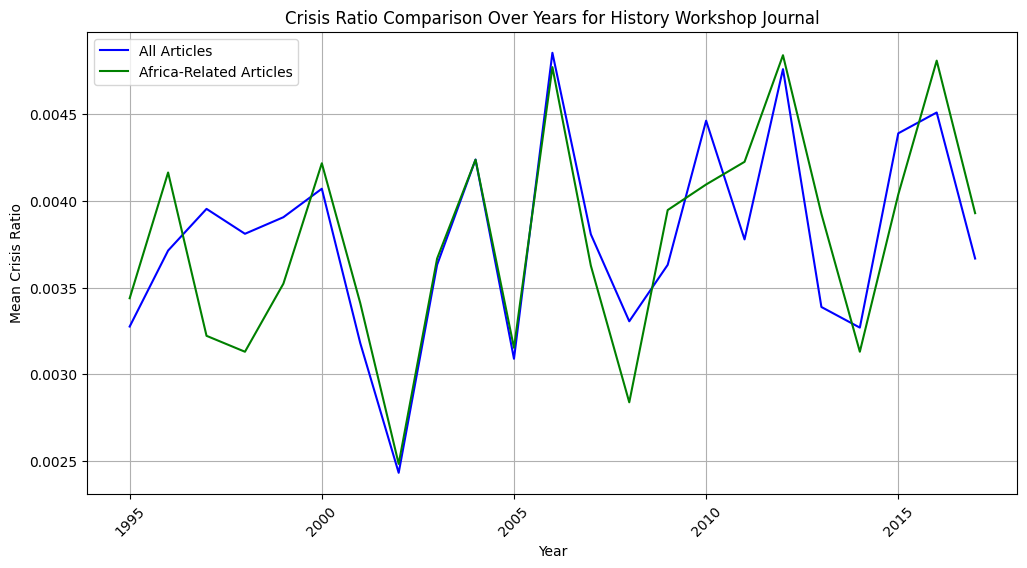

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to calculate crisis ratio
def calculate_crisis_ratio(full_text, word_count):
    crisis_keywords = ['crisis', 'conflict', 'war', 'famine', 'disaster', 'emergency']
    text = ' '.join(full_text).lower()
    crisis_count = sum(text.count(keyword) for keyword in crisis_keywords)
    return crisis_count / word_count if word_count > 0 else 0

# Load data
file_path = "part-1.jsonl"
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter for specific journals
selected_journals = [
    "The Historical Journal",
    "Past & Present",
    "History Workshop Journal"
]

df = df[df['isPartOf'].isin(selected_journals)]

# Calculate crisis ratio for all articles
df['crisis_ratio'] = df.apply(lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']), axis=1)

# Filter Africa-related articles
africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Calculate crisis ratio for Africa-related articles
df_africa_related['crisis_ratio'] = df_africa_related.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

# Group by 'isPartOf' and 'publicationYear', then calculate mean crisis ratio
crisis_ratio_all = df.groupby(['isPartOf', 'publicationYear'])['crisis_ratio'].mean().reset_index()
crisis_ratio_africa = df_africa_related.groupby(['isPartOf', 'publicationYear'])['crisis_ratio'].mean().reset_index()

# Merge dataframes
crisis_ratio_comparison = pd.merge(
    crisis_ratio_all,
    crisis_ratio_africa,
    on=['isPartOf', 'publicationYear'],
    suffixes=('_all', '_africa')
)

# Plot for each selected journal
for journal in selected_journals:
    plt.figure(figsize=(12, 6))
    journal_data = crisis_ratio_comparison[crisis_ratio_comparison['isPartOf'] == journal]
    plt.plot(journal_data['publicationYear'], journal_data['crisis_ratio_all'], label='All Articles', color='blue')
    plt.plot(journal_data['publicationYear'], journal_data['crisis_ratio_africa'], label='Africa-Related Articles', color='green')
    plt.title(f'Crisis Ratio Comparison Over Years for {journal}')
    plt.xlabel('Year')
    plt.ylabel('Mean Crisis Ratio')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

## Amount of articles in each journal

#### The Historical Journal 4090
#### Past & Present 2158
#### History Workshop Journal 1322

The code below code will give you a count of crisis-related words in each document. Adjust the crisis_terms list as needed to include more related terms.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/james.chattock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top words related to 'crisis' in The Journal of African History:
[('the', 1864), (',', 1061), ('of', 860), ('in', 758), ('.', 566), ('and', 524), ('a', 462), ('to', 316), ('was', 193), (':', 178)]


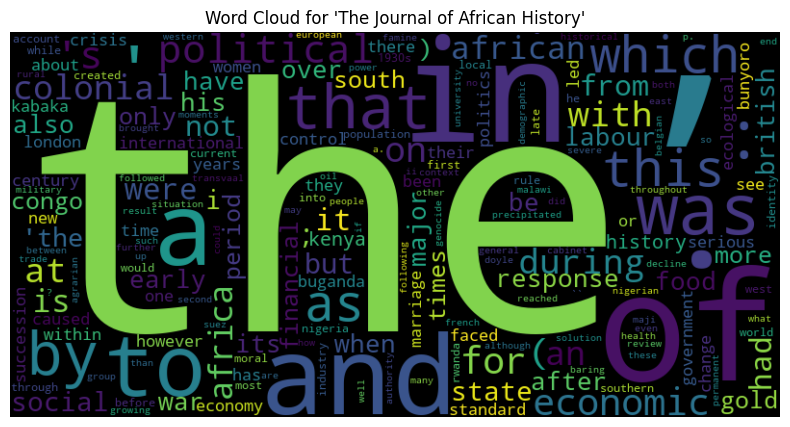

Top words related to 'crisis' in Past & Present:
[('the', 4383), (',', 2706), ('of', 2606), ('in', 1560), ('and', 1320), ('.', 1272), ('a', 979), ('to', 582), ('``', 582), ("''", 517)]


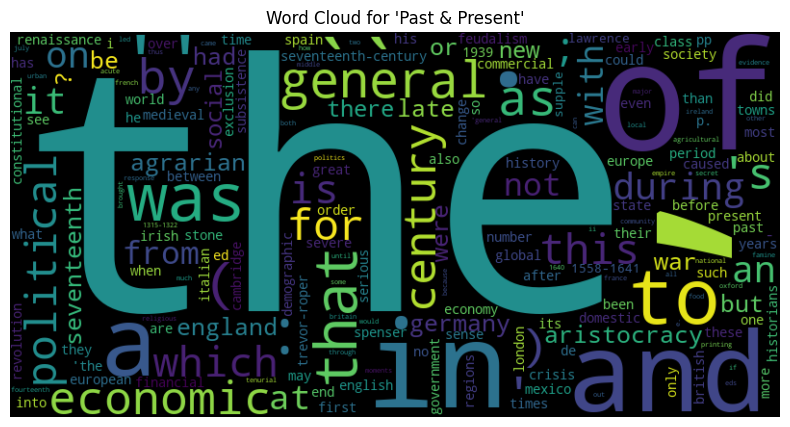

Top words related to 'crisis' in The Historical Journal:
[('the', 8325), (',', 4331), ('of', 4077), ('.', 2307), ('in', 2148), ('and', 1943), ('a', 1481), ('to', 1222), ("'", 785), ('was', 713)]


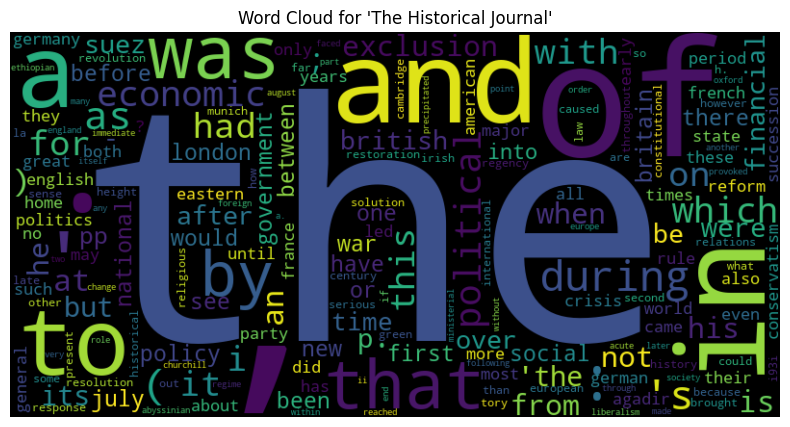

Top words related to 'crisis' in Journal of the Historical Society of Nigeria:
[('the', 869), ('of', 342), (',', 321), ('in', 280), ('.', 242), ('and', 201), ('a', 135), ('to', 119), ('was', 76), ('that', 76)]


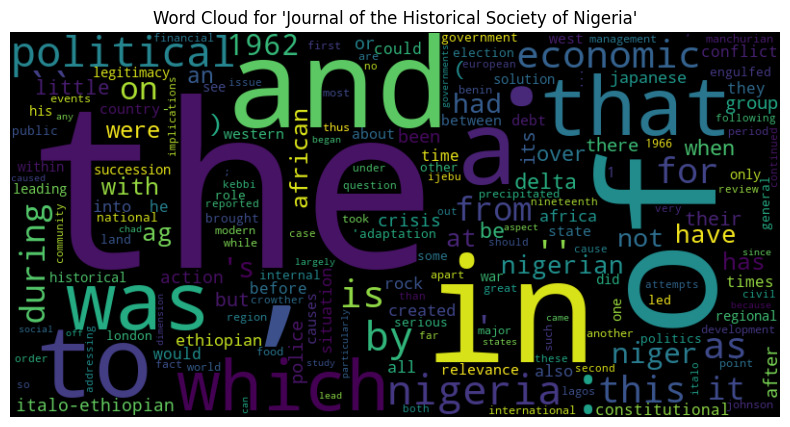

Top words related to 'crisis' in History Workshop Journal:
[('the', 901), ('of', 522), (',', 505), ('in', 327), ('and', 249), ('.', 240), ('a', 201), ('to', 118), ("'", 92), (':', 87)]


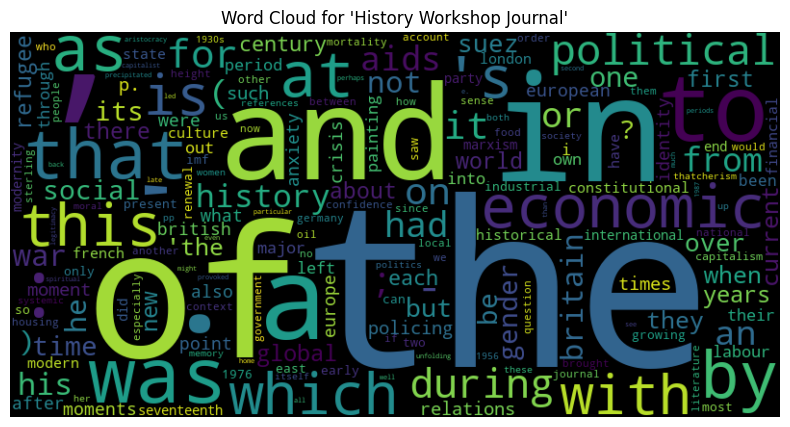

Top words related to 'crisis' in Transactions of the Historical Society of Ghana:
[('the', 167), ('of', 74), (',', 70), ('in', 69), ('.', 60), ('to', 40), ('a', 37), ('and', 35), ('was', 22), ('asante', 19)]


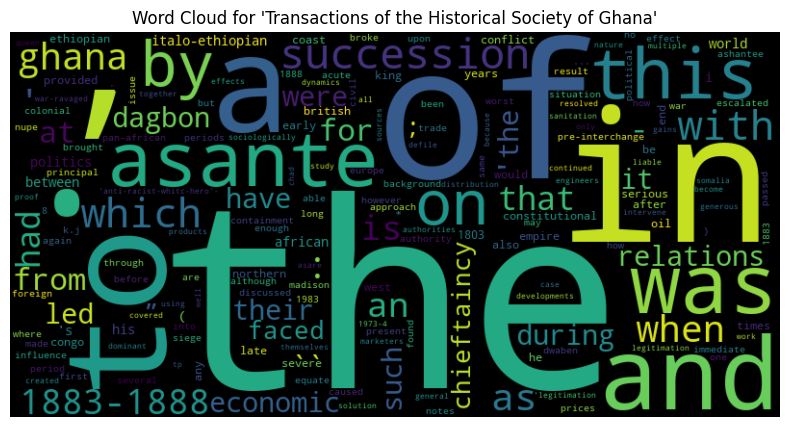

In [12]:
import pandas as pd
import nltk
import json
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure NLTK resources are available
nltk.download('punkt')

# Load your data
file_path = "part-1.jsonl"
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# Function to find words related to "crisis"
def find_related_words(text, target_word="crisis", window=5):
    if isinstance(text, list):
        text = " ".join(text)
    tokens = word_tokenize(text.lower())
    related_words = []
    for i, word in enumerate(tokens):
        if word == target_word:
            start = max(i - window, 0)
            end = min(i + window + 1, len(tokens))
            related_words.extend(tokens[start:i] + tokens[i+1:end])
    return related_words

# Analyze each journal
journal_related_words = defaultdict(list)

for _, row in df.iterrows():
    journal = row['isPartOf']
    full_text = row['fullText']
    related_words = find_related_words(full_text)
    journal_related_words[journal].extend(related_words)

# Frequency analysis and visualization
for journal, words in journal_related_words.items():
    word_freq = Counter(words)
    print(f"Top words related to 'crisis' in {journal}:")
    print(word_freq.most_common(10))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for '{journal}'")
    plt.axis('off')
    plt.show()

Removing irrelevent words

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/james.chattock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top words related to 'crisis' in The Journal of African History:
[('political', 91), ('economic', 82), ('colonial', 66), ('africa', 63), ('african', 60), ('state', 41), ('social', 41), ('food', 35), ('british', 34), ('labour', 33)]


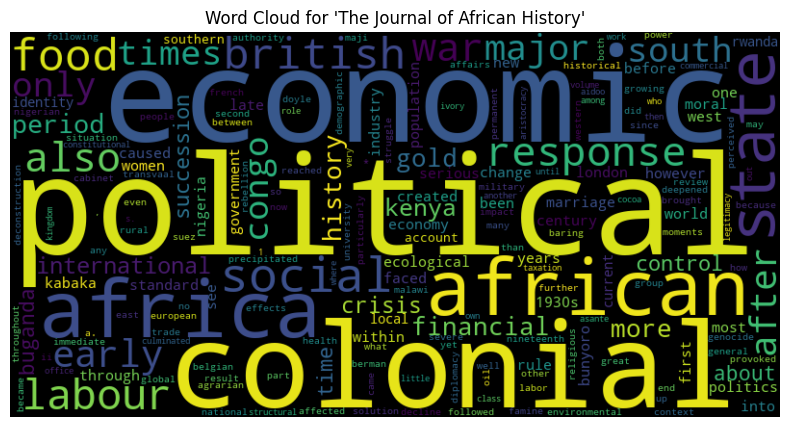

Top words related to 'crisis' in Past & Present:
[('general', 232), ('economic', 207), ('century', 198), ('political', 185), ('aristocracy', 110), ('late', 106), ('seventeenth', 104), ('war', 104), ('agrarian', 103), ('germany', 98)]


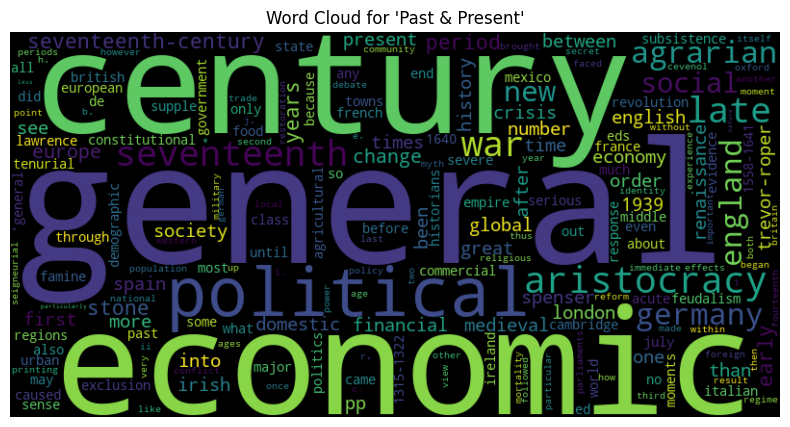

Top words related to 'crisis' in The Historical Journal:
[('political', 335), ('economic', 315), ('exclusion', 177), ('british', 144), ('financial', 142), ('suez', 141), ('after', 136), ('time', 128), ('pp', 122), ('war', 105)]


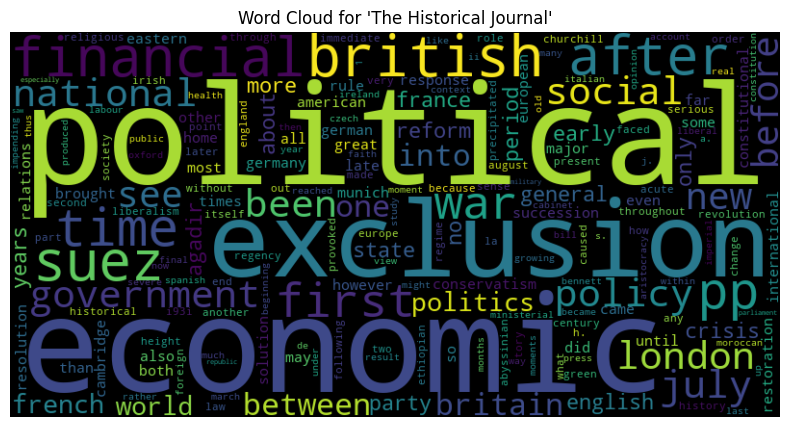

Top words related to 'crisis' in Journal of the Historical Society of Nigeria:
[('political', 45), ('nigeria', 42), ('economic', 39), ('1962', 27), ('niger', 25), ('nigerian', 21), ('ag', 21), ('african', 20), ('delta', 16), ('little', 15)]


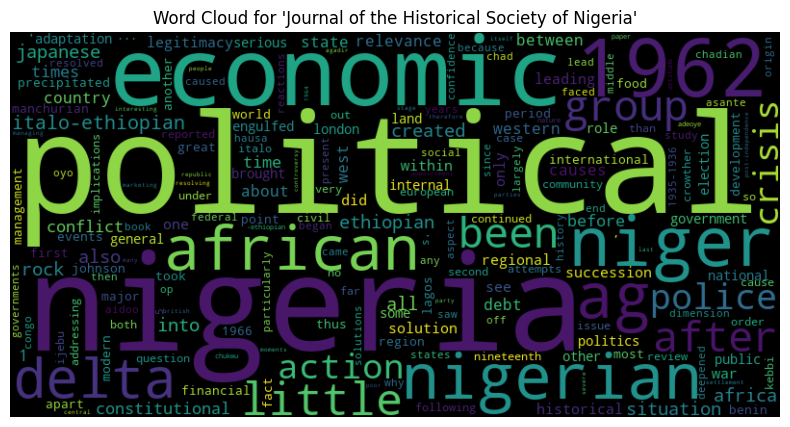

Top words related to 'crisis' in History Workshop Journal:
[('economic', 44), ('political', 37), ('aids', 25), ('history', 22), ('war', 20), ('britain', 20), ('one', 18), ('social', 17), ('gender', 17), ('time', 17)]


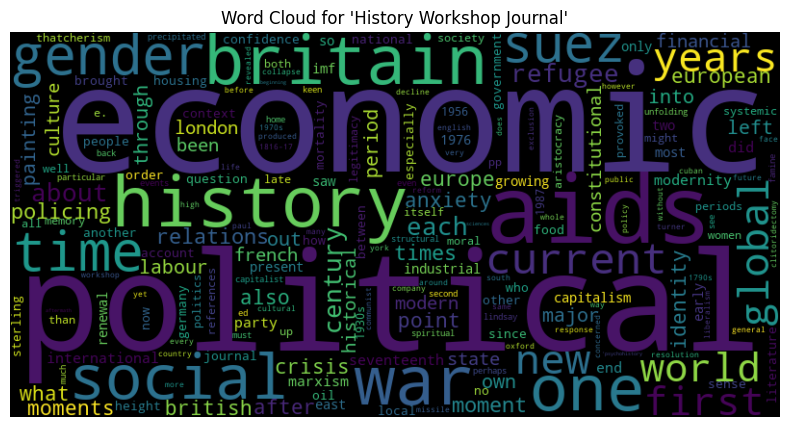

Top words related to 'crisis' in Transactions of the Historical Society of Ghana:
[('asante', 19), ('succession', 12), ('ghana', 9), ('1883-1888', 8), ('economic', 5), ('dagbon', 5), ('relations', 5), ('faced', 4), ('chieftaincy', 4), ('”', 4)]


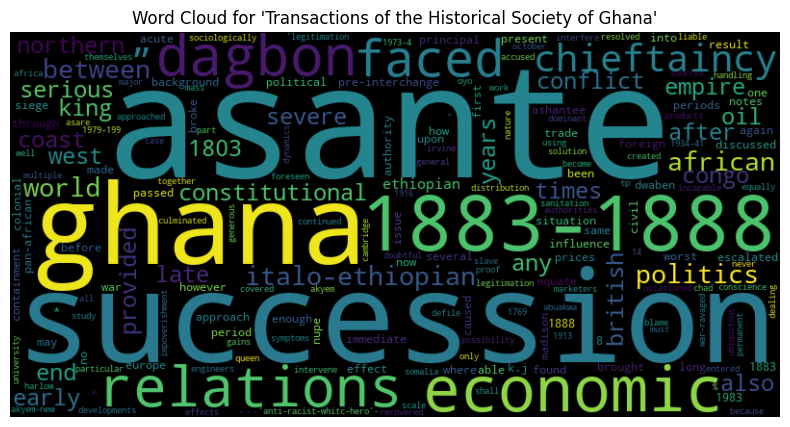

In [15]:
import pandas as pd
import nltk
import json
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure NLTK resources are available
nltk.download('punkt')

# Load your data
file_path = "part-1.jsonl"
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# List of common words to exclude
common_words = set([
    'is', 'to', 'the', 'for', 'and', 'with', 'in', 'of', 'on', 'at', 'by', 
    'from', 'as', 'an', 'it', 'or', 'if', 'but', 'be', 'has', 'have', 'was', 
    'were', 'are', 'can', 'will', 'would', 'should', 'could', 'a', 'this', 
    'that', 'these', 'those', 'the', 'there', 'their', 'they', 'them', 'he', 
    'as', 'she', 'his', 'her', 'him', 'i', 'you', 'we', 'us', 'our', 'your',
    '.', ',', '!', '?', ':', ';', '(', ')', '[', ']', '{', '}', '<', '>',
    'a', 'an', 'the', 'and', 'or', 'but', 'if', 'whether', 'while', 'although',  
    "'", 'which' , 'had' , '``' , "'s" , 'which' , "'" , 'not' , "''" , '-' , 
    'when' , "'the", 'during', 'its' , 'p.' , 'its' , 'over' , 'such' , 'led' 
])

# Function to find words related to "crisis"
def find_related_words(text, target_word="crisis", window=5):
    if isinstance(text, list):
        text = " ".join(text)
    tokens = word_tokenize(text.lower())
    related_words = []
    for i, word in enumerate(tokens):
        if word == target_word:
            start = max(i - window, 0)
            end = min(i + window + 1, len(tokens))
            related_words.extend(tokens[start:i] + tokens[i+1:end])
    # Filter out common words
    filtered_words = [word for word in related_words if word not in common_words]
    return filtered_words

# Analyze each journal
journal_related_words = defaultdict(list)

for _, row in df.iterrows():
    journal = row['isPartOf']
    full_text = row['fullText']
    related_words = find_related_words(full_text)
    journal_related_words[journal].extend(related_words)

# Frequency analysis and visualization
for journal, words in journal_related_words.items():
    word_freq = Counter(words)
    print(f"Top words related to 'crisis' in {journal}:")
    print(word_freq.most_common(10))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for '{journal}'")
    plt.axis('off')
    plt.show()

In [25]:
import pandas as pd
import nltk
import json
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import networkx as nx

# Ensure NLTK resources are available
nltk.download('punkt')

# Load your data
file_path = "part-1.jsonl"
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# List of common words to exclude
common_words = set([
    'is', 'to', 'the', 'for', 'and', 'with', 'in', 'of', 'on', 'at', 'by', 
    'from', 'as', 'an', 'it', 'or', 'if', 'but', 'be', 'has', 'have', 'was', 
    'were', 'are', 'can', 'will', 'would', 'should', 'could', 'a', 'this', 
    'that', 'these', 'those', 'the', 'there', 'their', 'they', 'them', 'he', 
    'as', 'she', 'his', 'her', 'him', 'i', 'you', 'we', 'us', 'our', 'your',
    '.', ',', '!', '?', ':', ';', '(', ')', '[', ']', '{', '}', '<', '>',
    'a', 'an', 'the', 'and', 'or', 'but', 'if', 'whether', 'while', 'although',  
    "'", 'which' , 'had' , '``' , "'s" , 'which' , "'" , 'not' , "''" , '-' , 
    'when' , "'the", 'during', 'its' , 'p.' , 'its' , 'over' , 'such' , 'led' 
])

# Function to find words related to "crisis"
def find_related_words(text, target_word="crisis", window=5):
    if isinstance(text, list):
        text = " ".join(text)
    tokens = word_tokenize(text.lower())
    related_words = []
    for i, word in enumerate(tokens):
        if word == target_word:
            start = max(i - window, 0)
            end = min(i + window + 1, len(tokens))
            related_words.extend(tokens[start:i] + tokens[i+1:end])
    # Filter out common words
    filtered_words = [word for word in related_words if word not in common_words]
    return filtered_words

# Analyze each journal
journal_related_words = defaultdict(list)

for _, row in df.iterrows():
    journal = row['isPartOf']
    full_text = row['fullText']
    related_words = find_related_words(full_text)
    journal_related_words[journal].extend(related_words)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/james.chattock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
import pandas as pd
import nltk
import json
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import networkx as nx
import plotly.graph_objects as go

# Create a network graph for each journal
for journal, words in journal_related_words.items():
    word_freq = Counter(words)
    top_words = word_freq.most_common(50)  # Adjust the number as needed
    
    # Create a graph
    G = nx.Graph()
    
    # Add nodes and edges
    for word, freq in top_words:
        G.add_node(word)
        G.add_edge("crisis", word, weight=freq)
    
    # Get positions using spring layout
    pos = nx.spring_layout(G, seed=42)
    
    # Create edge traces
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    # Create node traces
    node_x = []
    node_y = []
    node_text = []
    node_color = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f'{node}: {word_freq.get(node, 0)}')
        node_color.append(word_freq.get(node, 0))

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        textposition="top center",
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=20,  # Constant size for all nodes
            color=node_color,
            colorbar=dict(
                thickness=15,
                title='Word Frequency',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    # Create the figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=f'Interactive Network Graph for "{journal}"',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20, l=5, r=5, t=40),
                        annotations=[dict(
                            text="Network graph showing words related to 'crisis'",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002)],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

    fig.show()

In [34]:
import pandas as pd
import nltk
import json
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import networkx as nx
import plotly.graph_objects as go

# Ensure NLTK resources are available
nltk.download('punkt')

# Load your data
file_path = "part-1.jsonl"
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# List of common words to exclude
common_words = set([
    'is', 'to', 'the', 'for', 'and', 'with', 'in', 'of', 'on', 'at', 'by',
    'from', 'as', 'an', 'it', 'or', 'if', 'but', 'be', 'has', 'have', 'was',
    'were', 'are', 'can', 'will', 'would', 'should', 'could', 'a', 'this',
    'that', 'these', 'those', 'there', 'their', 'they', 'them', 'he',
    'as', 'she', 'his', 'her', 'him', 'i', 'you', 'we', 'us', 'our', 'your',
    '.', ',', '!', '?', ':', ';', '(', ')', '[', ']', '{', '}', '<', '>',
    'if', 'whether', 'while', 'although', "'", 'which', 'had', '``',
    "'s", 'not', "''", '-', 'when', "'the", 'during', 'its', 'p.',
    'over', 'such', 'led'
])

# Function to find words related to "crisis" and their top neighbors
def find_related_and_neighbors(text, target_word="crisis", window=5):
    tokens = word_tokenize(text.lower())
    related_words = []
    neighbors_dict = defaultdict(list)

    for i, word in enumerate(tokens):
        if word == target_word:
            start = max(i - window, 0)
            end = min(i + window + 1, len(tokens))
            context = tokens[start:i] + tokens[i+1:end]
            filtered_context = [w for w in context if w not in common_words]
            related_words.extend(filtered_context)

            for related_word in filtered_context:
                neighbors_context = tokens[start:i] + tokens[i+1:end]
                neighbors_filtered = [w for w in neighbors_context if w not in common_words and w != related_word]
                neighbors_dict[related_word].extend(neighbors_filtered)

    # Getting top 3 neighbors for each related word
    top_neighbors = {word: Counter(neighbors).most_common(3) for word, neighbors in neighbors_dict.items()}

    return related_words, top_neighbors

# Analyze each journal
journal_related_words = defaultdict(list)
journal_neighbors = defaultdict(dict)

for _, row in df.iterrows():
    journal = row['isPartOf']
    full_text = str(row['fullText'])  # Ensure text is a string
    related_words, top_neighbors = find_related_and_neighbors(full_text)
    journal_related_words[journal].extend(related_words)
    # Merge neighbor data
    for word, neighbors in top_neighbors.items():
        if word not in journal_neighbors[journal]:
            journal_neighbors[journal][word] = Counter()
        journal_neighbors[journal][word].update(dict(neighbors))

# Create a network graph for each journal
for journal, words in journal_related_words.items():
    word_freq = Counter(words)
    top_words = word_freq.most_common(50)  # Adjust the number as needed

    # Create a graph
    G = nx.Graph()

    # Add "crisis" node
    G.add_node("crisis", size=word_freq["crisis"])

    # Add nodes and edges
    for word, freq in top_words:
        if word == "crisis":
            continue
        G.add_node(word, size=freq)
        G.add_edge("crisis", word, weight=freq)

        if word in journal_neighbors[journal]:
            for neighbor, count in journal_neighbors[journal][word].most_common(3):
                G.add_node(neighbor, size=count)
                G.add_edge(word, neighbor, weight=count)

    # Get positions using spring layout
    pos = nx.spring_layout(G, seed=42)

    # Create edge traces
    edge_x = []
    edge_y = []
    for edge in G.edges(data=True):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    # Create node traces
    node_x = []
    node_y = []
    node_text = []
    node_color = []
    for node, attr in G.nodes(data=True):
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f'{node}: {attr.get("size", 0)}')
        node_color.append(attr.get("size", 0))

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        textposition="top center",
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=[attr.get("size", 0) for node, attr in G.nodes(data=True)],
            color=node_color,
            colorbar=dict(
                thickness=15,
                title='Word Frequency',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    # Create the figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=f'Interactive Network Graph for "{journal}"',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20, l=5, r=5, t=40),
                        annotations=[dict(
                            text="Network graph showing words related to 'crisis'",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002)],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

    fig.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/james.chattock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
